# 1. Perkenalan
---

Nama : Venu Fitratama

Batch : FTDS-016-RMT

Dataset : 
>select limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
>
>from `bigquery-public-data.ml_datasets.credit_card_default`
>
>limit 31952`

Objective : Membuat model classification untuk memprediksi `default_payment_next_month` dengan dataset.

---
# 2. Import Libraries
---

**Load Data & Visual Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Machine Learning Library**

In [2]:
from sklearn.model_selection import train_test_split #datasplit
from feature_engine.outliers import Winsorizer #outlier handling
from sklearn.preprocessing import MinMaxScaler #feature scaling

#model definition
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV #hyperparameter
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #matrix

---
# 3. Data Loading
---

In [3]:
#data import
df2 = pd.read_csv('dataset.csv')
#data duplicate
df = df2.copy()
#menampilkan semua kolom pada dataset
pd.set_option('display.max_columns', None)

#head dan tail dataset
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,3,0,50,0,0,0,-1,-1,-1,45771,23343,0,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,-2,399,2430,0,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,2,35892,32546,30660,31320,36227,35569,2007,2000,1500,5400,0,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,320000,1,2,1,41,1,-2,-2,-2,-2,-2,0,0,0,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,-1,628,662,596,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,0,13429,14502,15564,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,0,42856,29248,17775,17833,18246,18642,1300,1600,650,700,700,700,0


In [4]:
df.shape

(2965, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

In [6]:
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


>Sebanyak 31.952 dicoba untuk diambil dari dataset query (tahun lahir * batch), namun dataset berisikan 24 kolom dengan type numerikal data dengan jumlah baris sebanyak 2.965 baris, tampaknya jumlah baris maximal pada data hanya sebesar 2.965 data.
>
>`limit_balance` mempunyai rata-rata sebesar 163.369 dengan minimal limit kartu kredit sebesar 100.000 dan maximal limit adalah 800.000
>
>Tidak terbaca adanya missing values pada dataset diatas.

In [7]:
#rename column

df = df.rename(columns={'pay_0' :'pay_1', 'default_payment_next_month' :'default_payment'})

>Mengganti nama kolom `pay_0` menjadi `pay_1` dan `default_payment_next_month` menjadi `default_payment`

---
# 4. Exploratory Data Analysis
---

**Visualisasi EDA Sederhana** - Histplot, Piechart

In [8]:
#Fungsi pemanggilan histplot - untuk melihat persebaran data
def histplot(df, variable):
    plt.figure(figsize=(15, 5))
    sns.histplot(df[variable], bins=20, kde=True)
    plt.title('Histplot')
    plt.show()

    print('skewness value: ', df[variable].skew())
    print('Min: ', df[variable].min())
    print('Max: ', df[variable].max())


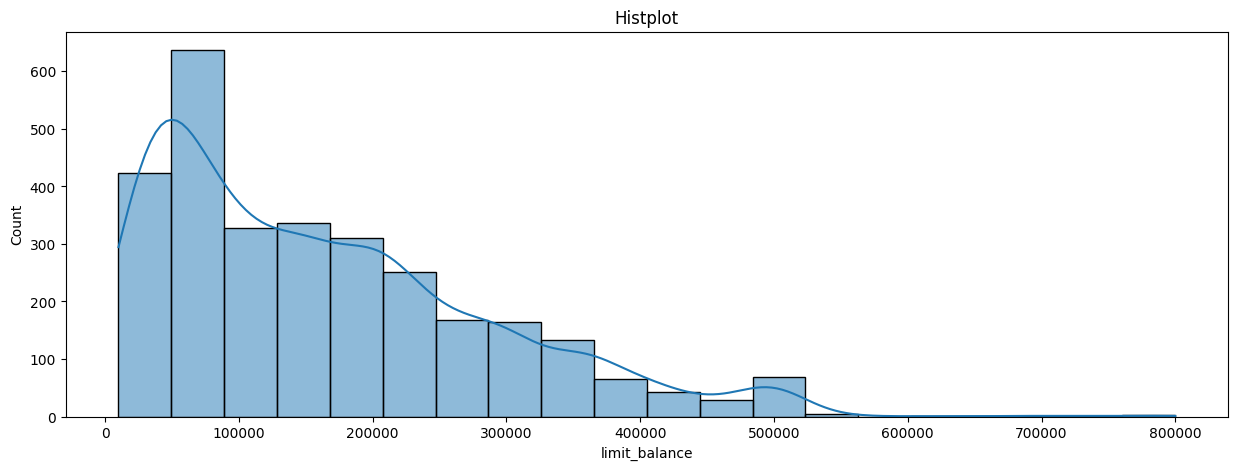

skewness value:  1.0004416437793329
Min:  10000
Max:  800000


In [9]:
histplot(df, 'limit_balance')

>Limit minimal dari credit card adalah 10.000 hingga 800.000, dimana limit terbanyak adalah diantara range 45.000 hingga 100.000. skewness data condong ke kiri, artinya semakin tinggi nilai credit card, semakin sedikit orang yang dapat aksesnya.
>
>Menurut schema pada bigquery, data age merupakan data numerikal sebenarnya.

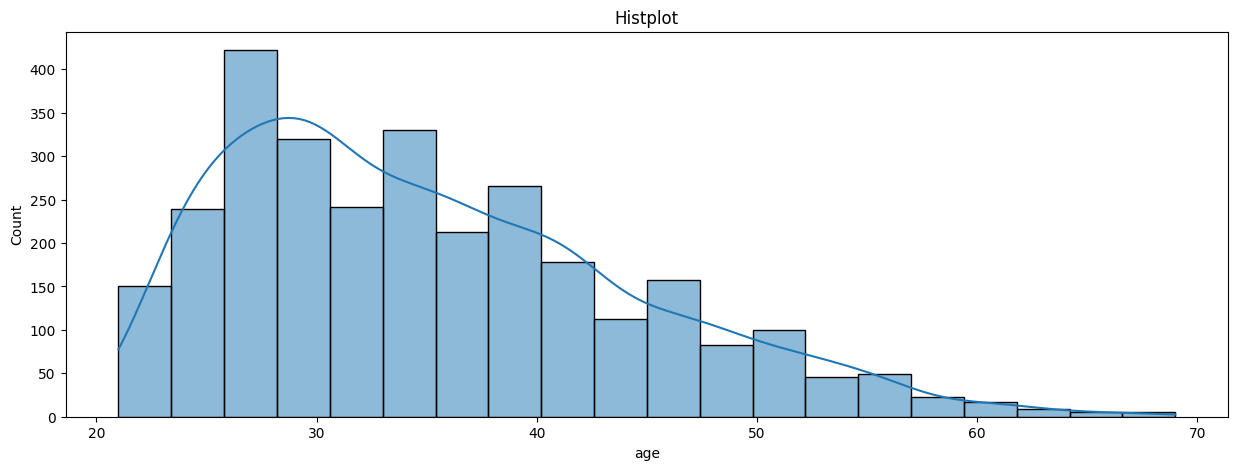

skewness value:  0.7728871800647298
Min:  21
Max:  69


In [10]:
histplot(df, 'age')

>Jumlah min usia penduduk yang mempunyai credit card adalah 21 tahun dan umur maximal adalah 69 tahun. persentase terbanyak untuk usia yang mempunyai credit card adalah penduduk dengan usia 30 tahun.
>
>Menurut schema pada bigquery, data age merupakan data numerikal sebenarnya.

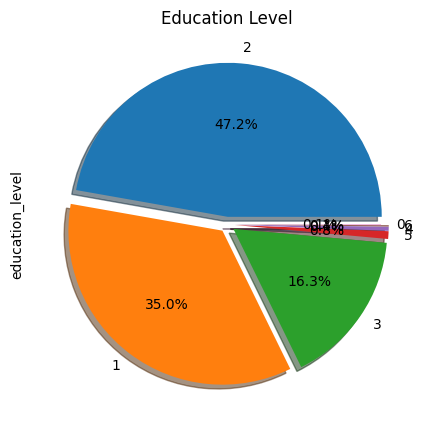

In [11]:
#Piechart Education Level
plt.figure(figsize=(5,5))
df['education_level'].value_counts().plot(kind='pie', explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0], autopct='%1.1f%%', shadow=True)
plt.title('Education Level')
plt.show()

>Kolom `education_level` dituliskan dalam bentuk angka, namun representatif dari angka-angka tersebut menunjukkan makna yang berbeda.
>
>Terlihat sesuai piechart bahwa level edukasi tertinggi ada pada level 2, level 1, level 3 dan kemudian level 5, 4, 6 dan 0
>
>Ini adalah indikasi angka dari level edukasi : 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

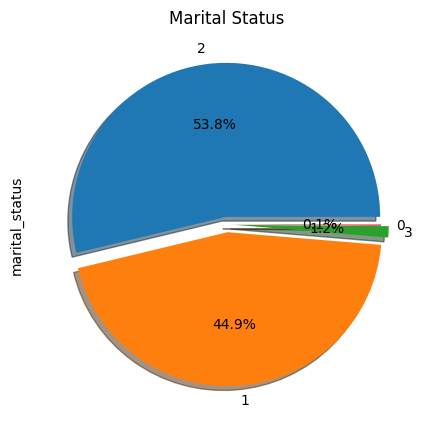

In [12]:
#Piechart Marital Status
plt.figure(figsize=(5,5))
df['marital_status'].value_counts().plot(kind='pie', explode=[0.05, 0.05, 0.05, 0], autopct='%1.1f%%', shadow=True)
plt.title('Marital Status')
plt.show()

>Kolom `marital_status` dituliskan dalam bentuk angka, namun representatif dari angka-angka tersebut menunjukkan makna yang berbeda.
>
>Terlihat sesuai piechart bahwa marital status dominan adalah label 2 dengan jumlah 53.8% kemuudian disusul oleh label 1 dengan jumlah 44.9% dan disusul oleh 3 sebesar 1,2% dan 0 sebesar 0.1%
>
>Ini adalah indikasi angka dari status pernikahan : 1=married, 2=single, 3=others

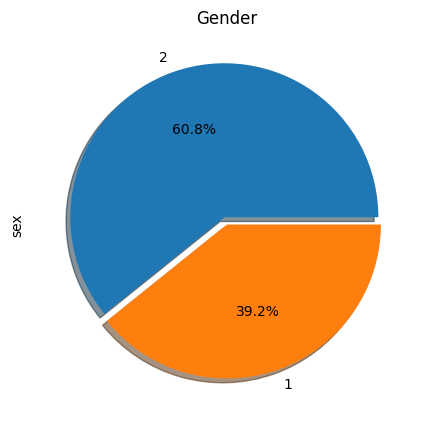

In [13]:
#Piechart Gender
plt.figure(figsize=(5,5))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0], shadow=True)
plt.title('Gender')
plt.show()

>Kolom `sex` dituliskan dalam bentuk angka, namun representatif dari angka-angka tersebut menunjukkan makna yang berbeda.
>
>Terlihat sesuai piechart bahwa gender dominan adalah gender dengan label 2, yaitu sebanyak 60.8% dan label 1 hanya sebesar 39.2% dari total 100%.
>
>Ini adalah indikasi angka dari gender : 1 = male, 2 = female

>pay 1 - 6 merupakan status pembayaran dari bulan april hingga september 2005 dengan indikasi : 1=payment delay for one month, 2=payment delay for two months, … 9=payment delay for nine months and above
>
>bill amount 1-6 mengindikasikan jumlah tagihan pada bulan april hingga september 2005 : 6 = April, 5 = Mei, ... 1 = September
>
>pay amount 1-6 mengindikasikan jumlah pembayaran pada bulan april hingga september 2005 : 6 = April, 5 = Mei, ... 1 = September

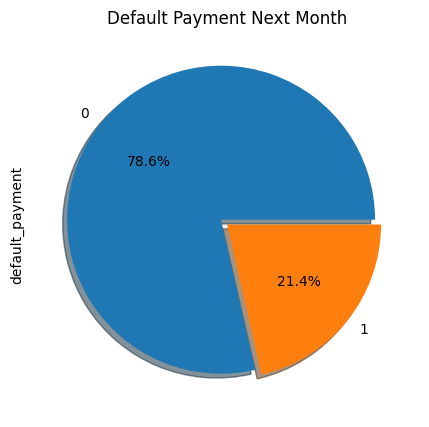

In [14]:
#Piechart Gender
plt.figure(figsize=(5,5))
df['default_payment'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0], shadow=True)
plt.title('Default Payment Next Month')
plt.show()

>Kolom `default_payment` sebagai target menunjukkan adanya ketidak-seimbangan target yang mana label 1 lebih sedikit daripada label 0, pada akhirnya ini dapat menyebabkan "mesin" yang dibuat akan kurang belajar dari pola label 1 karena datanya terlalu sedikit.
>
>dari kolom ini, didapat informasi bahwa 78.6% orang di taiwan mampu untuk membayar tagihan credit card mereka, sedangkan sisanya tidak dapat membayar tagihan credit card.

**Korelasi Antar Kolom** - Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

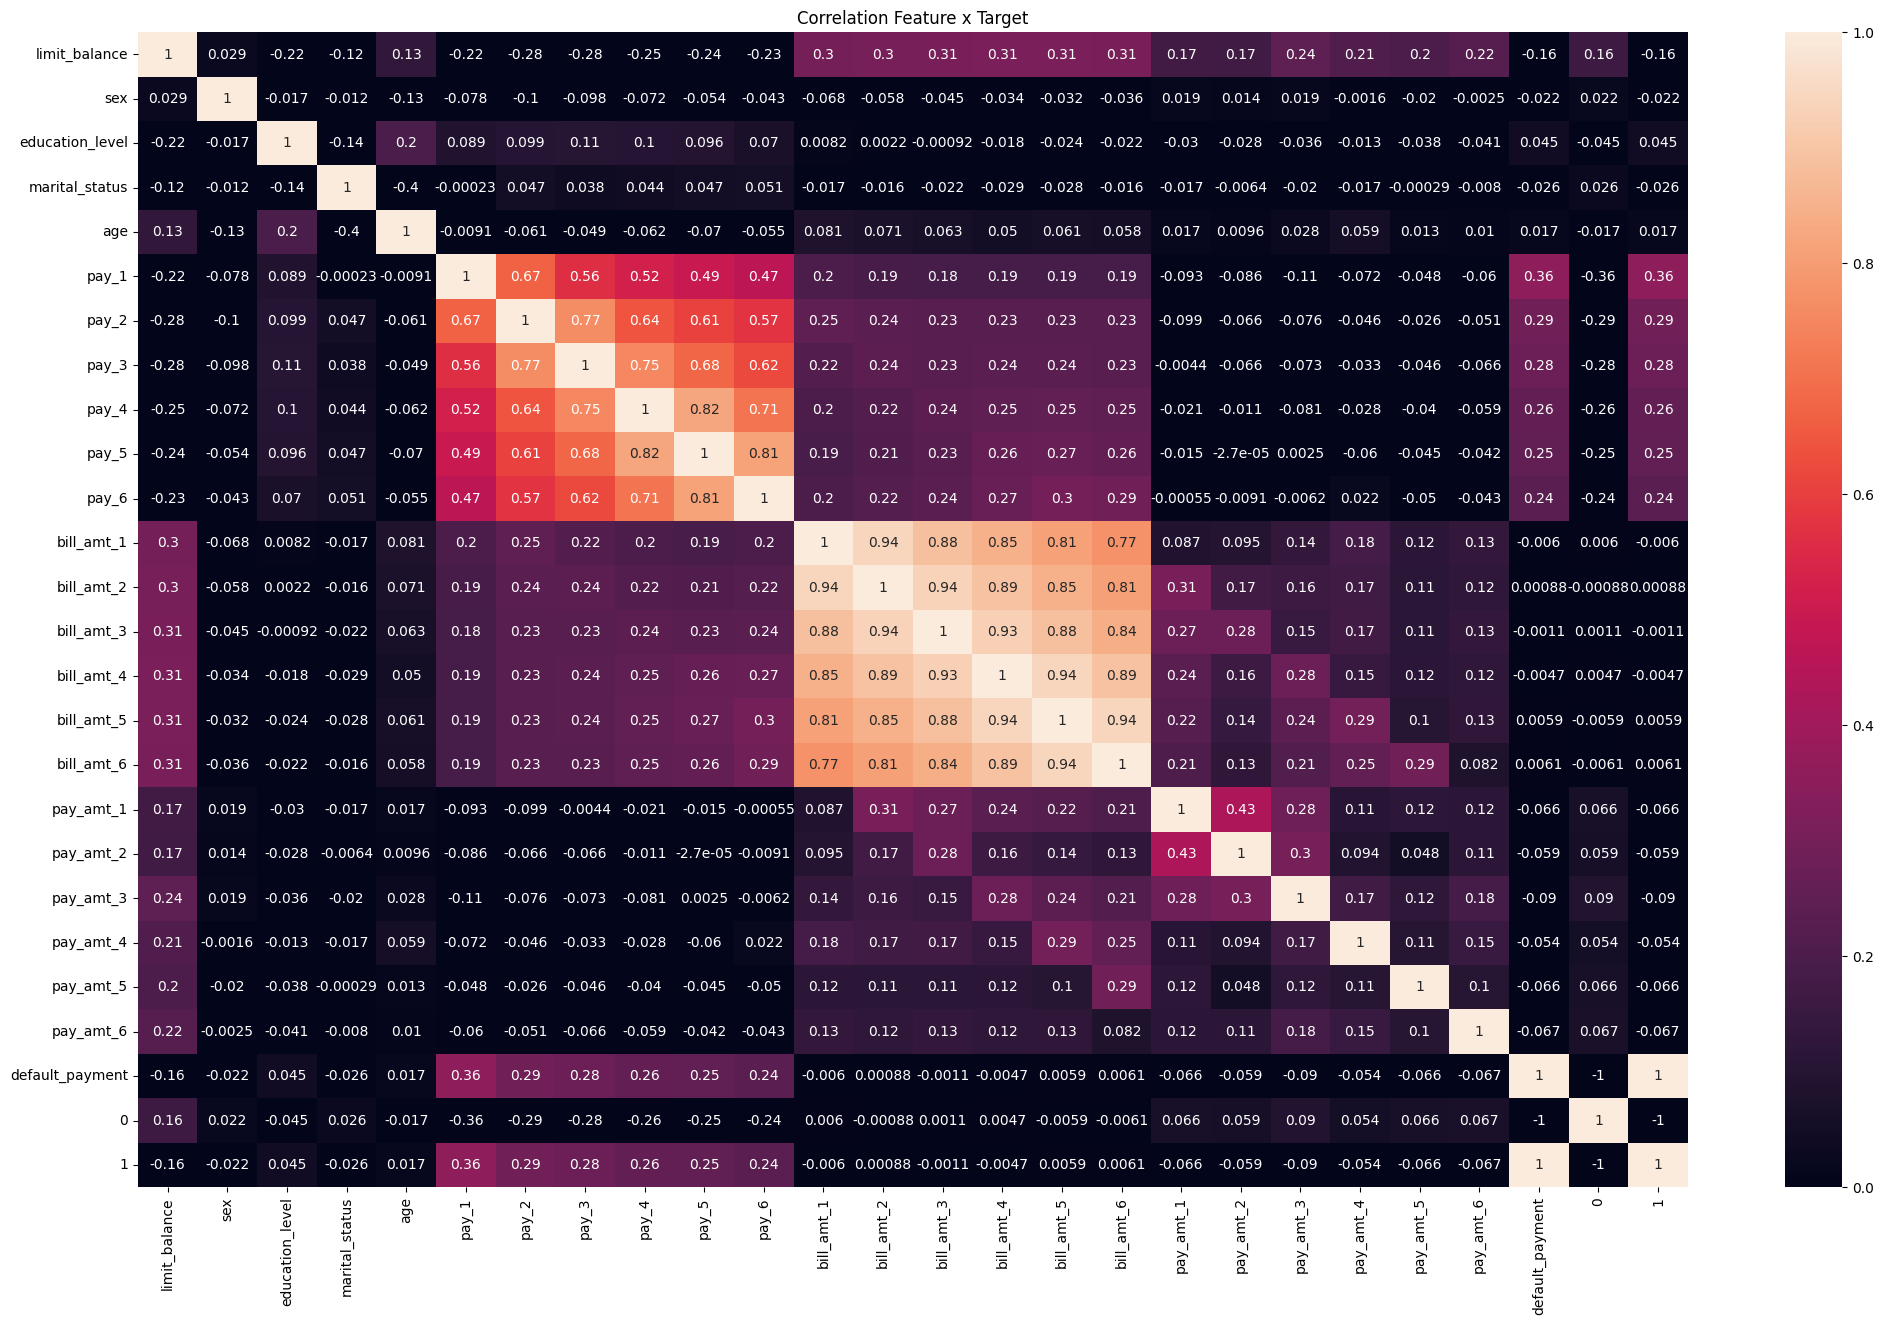

In [15]:
corr = pd.concat([df, pd.get_dummies(df['default_payment'])], axis=1).corr()

plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True, vmin=0, vmax=1)
plt.title('Correlation Feature x Target')
plt.show

>`limit_balance` mempunyai korelasi lebih dari -0.1 terhadap `default_payment`
>
>korelasi `pay_6` hingga `pay_1` secara berkala meningkat
>
>overall, semua kolom mempengaruhi target, namun tingkat korelasinya kecil.
>
>`pay_1 - pay_6` dan `bill_amt_1 - bill_amt_6` memiliki korelasi yang tinggi antar 1 dan yang lainnya.
>
>agar tidak terjadinya overfitting, maka hanya 1 dari kolom `pay` dan `bill_amt` yang akan diambil

---
# 5. Data Preprocessing
---

**Data Inference**

In [16]:
#mengambil 15 data inf
data_inf = df.sample(15, random_state=1)

#menghapus data inference dari dataset
df = df.drop(data_inf.index)

#reset index dataset
df.reset_index(drop=True, inplace=True)

#reset index data inference
data_inf.reset_index(drop=True, inplace=True)

In [17]:
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
0,130000,2,2,1,29,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
1,200000,2,2,1,27,1,3,2,2,2,2,183994,182427,182657,174547,181454,177141,5200,7000,0,13300,0,6200,1
2,50000,1,2,2,26,2,-1,-1,-1,-1,-1,291,291,291,291,291,0,291,291,291,291,0,873,0
3,240000,1,2,2,29,0,0,0,0,0,0,243774,242529,242079,243114,213930,219009,8891,12350,15969,7968,8700,17500,0
4,20000,2,2,2,39,0,0,0,0,0,0,20885,20373,19391,20085,19938,0,2157,1660,1300,541,0,0,0
5,300000,2,5,2,26,0,0,0,0,-2,-2,293880,242669,76777,34072,11632,15429,11128,47009,34044,11677,15483,6098,0
6,220000,2,2,2,47,0,0,0,0,0,0,103078,111729,115173,116513,119370,121516,10000,6500,5000,5000,5000,5000,0
7,120000,2,1,2,29,-1,-1,-1,0,-1,-1,3945,5795,10863,1601,1126,4802,5894,10863,0,1126,4802,9751,0
8,310000,2,1,2,35,-1,0,0,0,-1,-1,27089,37919,40136,31242,18962,9950,20000,21890,15000,9481,19900,0,0
9,40000,2,2,1,23,2,2,2,2,2,2,33895,33068,35704,36173,36796,37288,0,3200,1500,1500,1400,1500,1


In [18]:
#drop data yang tidak digunakan
data_inf_drop = data_inf.drop(['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'default_payment'], axis=1)

**Split Train-Set & Test-Set**

In [19]:
#fitur (X)
X = df.drop('default_payment', axis=1)

#target (y)
y = df['default_payment']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Train Size : ", X_train.shape)
print("Test Size : ", X_test.shape)

Train Size :  (2360, 23)
Test Size :  (590, 23)


>dilakukan pengambilan umum sebanyak 20% test dan 80% test-train dataset agar 'machine' dapat 'belajar' untuk melakukan prediksi.

**Missing Values Handling**

In [21]:
#Memastikan ulang tidak ada missing values pada data
print('Missing values X-train:', X_train.isnull().sum().sum())
print('Missing values X-test :', X_test.isnull().sum().sum())
print('Missing values y-train:', y_train.isnull().sum().sum())
print('Missing values y-test :', y_test.isnull().sum().sum())

Missing values X-train: 0
Missing values X-test : 0
Missing values y-train: 0
Missing values y-test : 0


**Outlier Handling**

In [22]:
#Fungsi pemanggilan histplot - untuk melihat persebaran data
def hist_box(df, variable):
    plt.figure(figsize=(15, 5))

    #histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=20)
    plt.title('Histogram')

    #boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print(variable, 'skewness value : ', df[variable].skew())

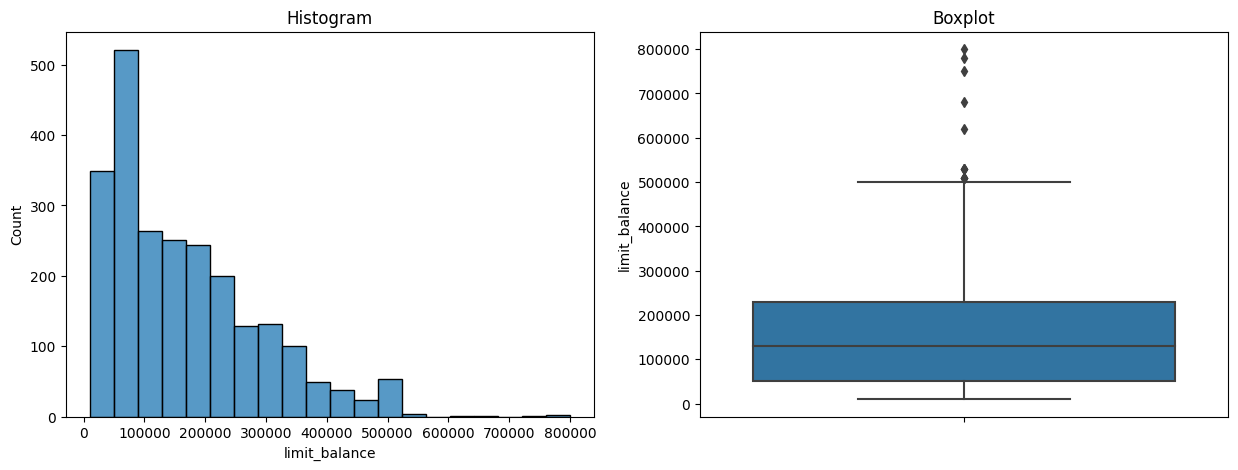

limit_balance skewness value :  1.0278228804451683


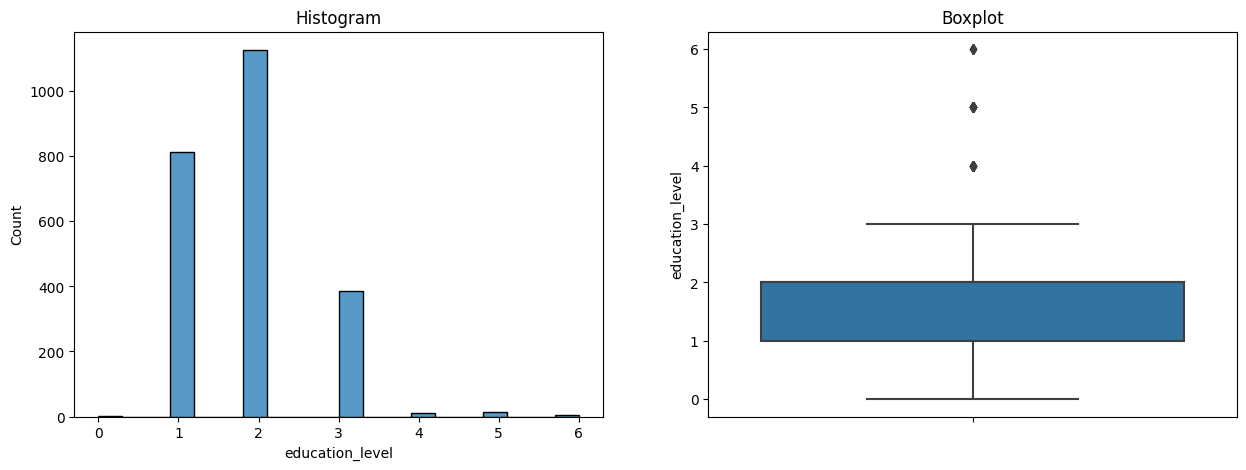

education_level skewness value :  0.8669553692681796


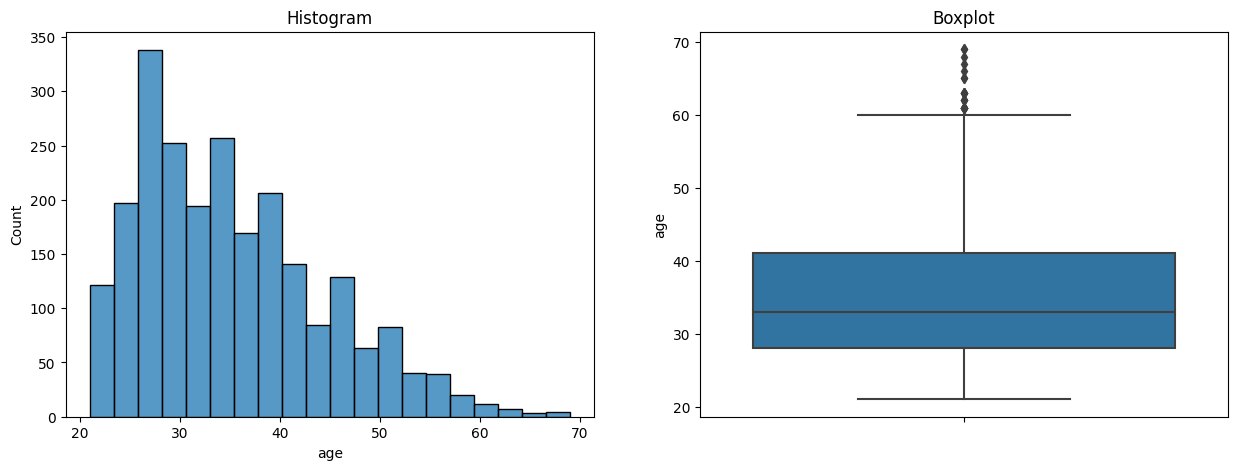

age skewness value :  0.7642336121575984


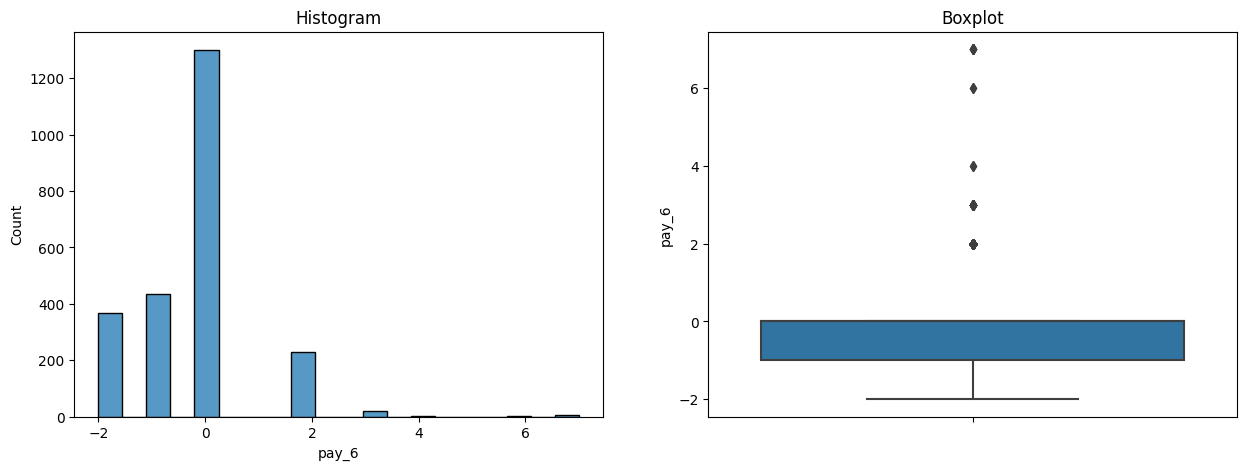

pay_6 skewness value :  1.0746416494377422


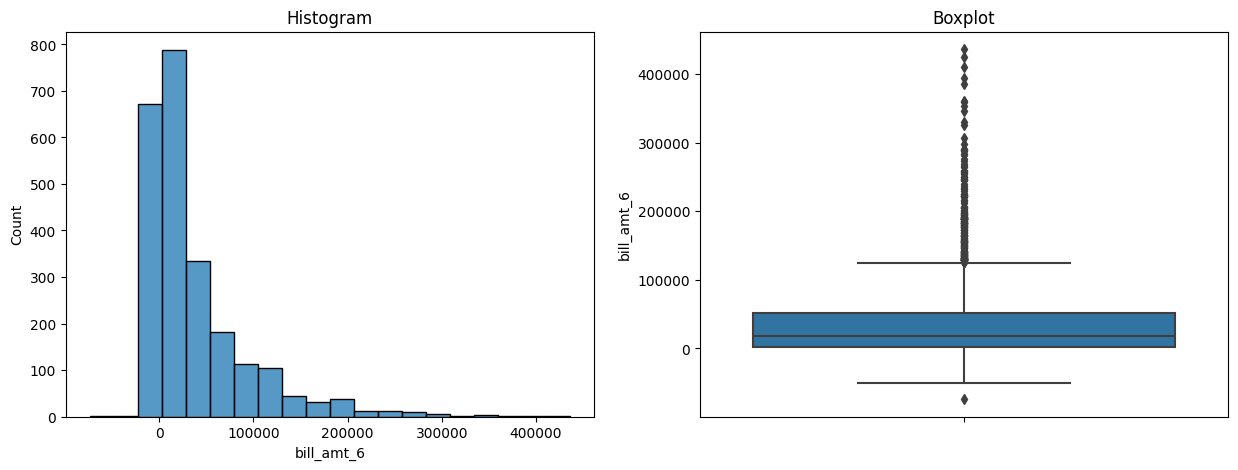

bill_amt_6 skewness value :  2.551283048933512


In [23]:
hist_box(X_train, 'limit_balance')
hist_box(X_train, 'education_level')
hist_box(X_train, 'age')

hist_box(X_train, 'pay_6')

hist_box(X_train, 'bill_amt_6')

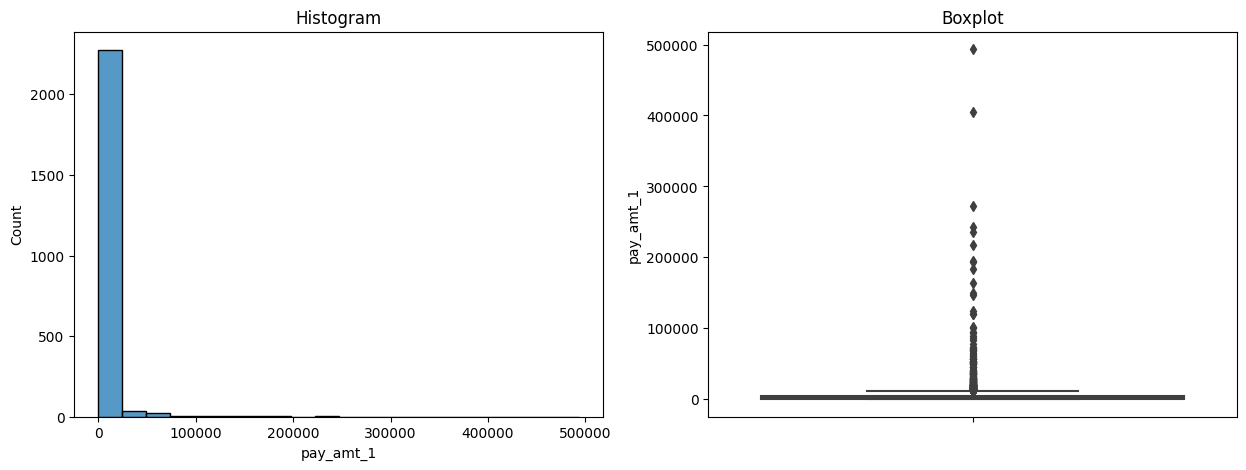

pay_amt_1 skewness value :  12.63412758509025


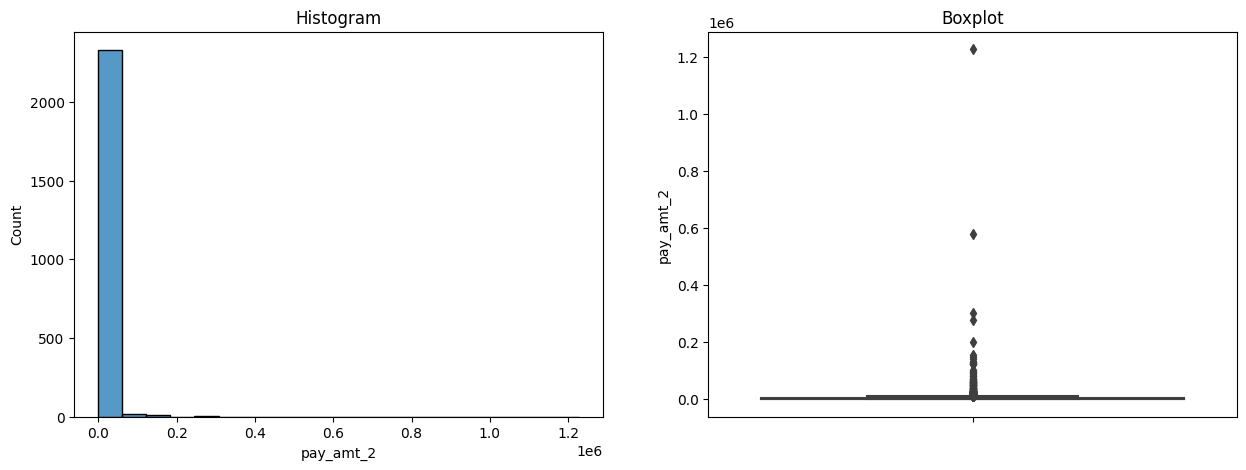

pay_amt_2 skewness value :  27.72984836546903


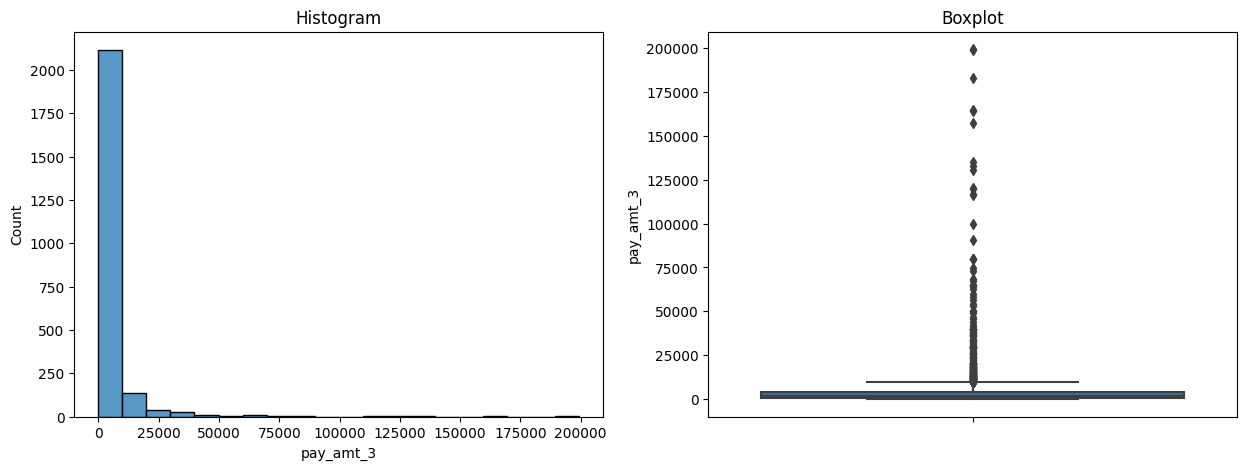

pay_amt_3 skewness value :  8.117110233517785


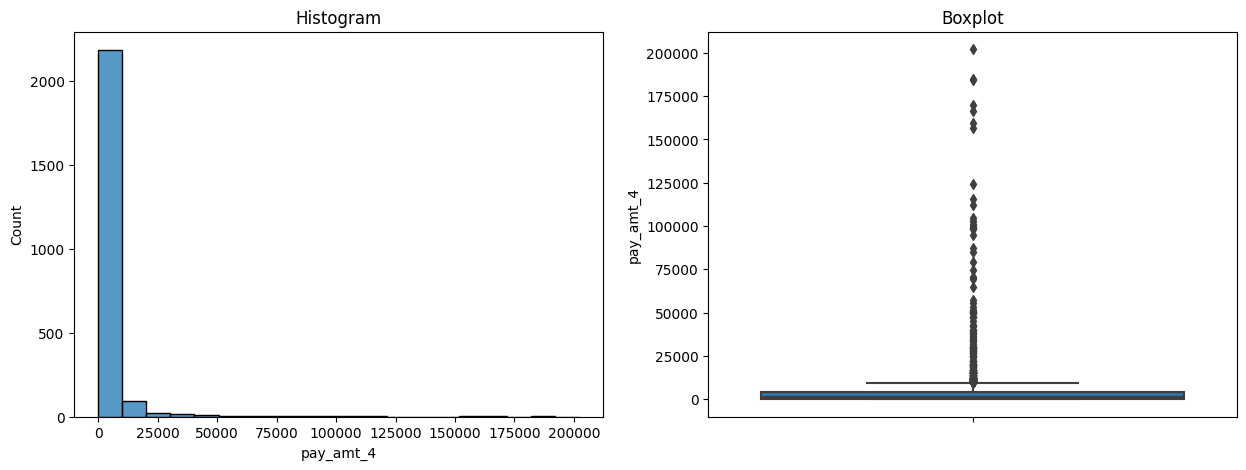

pay_amt_4 skewness value :  8.41806742703924


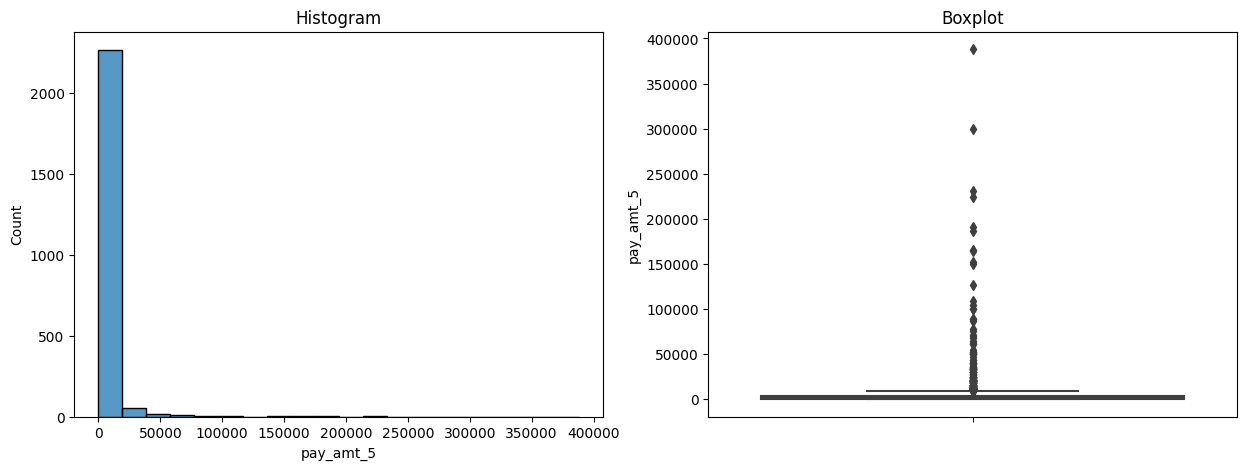

pay_amt_5 skewness value :  12.022448541027575


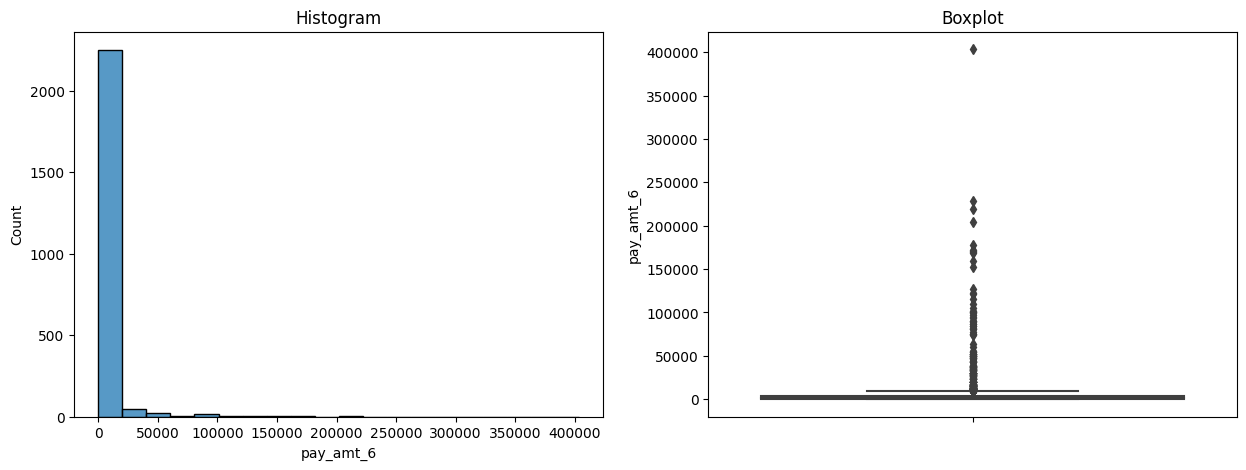

pay_amt_6 skewness value :  9.493967996712001


In [24]:
hist_box(X_train, 'pay_amt_1')
hist_box(X_train, 'pay_amt_2')
hist_box(X_train, 'pay_amt_3')
hist_box(X_train, 'pay_amt_4')
hist_box(X_train, 'pay_amt_5')
hist_box(X_train, 'pay_amt_6')

**Capping**

>metode capping digunakan untuk handle outlier skewed distribution, 

In [25]:
windsoriser_iqr = Winsorizer(capping_method='iqr',
                          tail='both',
                          fold=1.5,
                          variables=['limit_balance', 'education_level', 'age', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'bill_amt_6'])

windsoriser_iqr.fit(X_train)

X_train_capped = windsoriser_iqr.transform(X_train)
X_test_capped = windsoriser_iqr.transform(X_test)

In [26]:
print('Left Tail Caps  : ', windsoriser_iqr.left_tail_caps_)
print('')
print('Right Tail Caps : ', windsoriser_iqr.right_tail_caps_)

Left Tail Caps  :  {'limit_balance': -220000.0, 'education_level': -0.5, 'age': 8.5, 'pay_6': -2.5, 'pay_amt_1': -5026.25, 'pay_amt_2': -5262.5, 'pay_amt_3': -5056.75, 'pay_amt_4': -5210.0, 'pay_amt_5': -5192.5, 'pay_amt_6': -5587.5, 'bill_amt_6': -72873.0}

Right Tail Caps :  {'limit_balance': 500000.0, 'education_level': 3.5, 'age': 60.5, 'pay_6': 1.5, 'pay_amt_1': 11043.75, 'pay_amt_2': 11157.5, 'pay_amt_3': 9761.25, 'pay_amt_4': 9526.0, 'pay_amt_5': 9515.5, 'pay_amt_6': 9752.5, 'bill_amt_6': 125155.0}


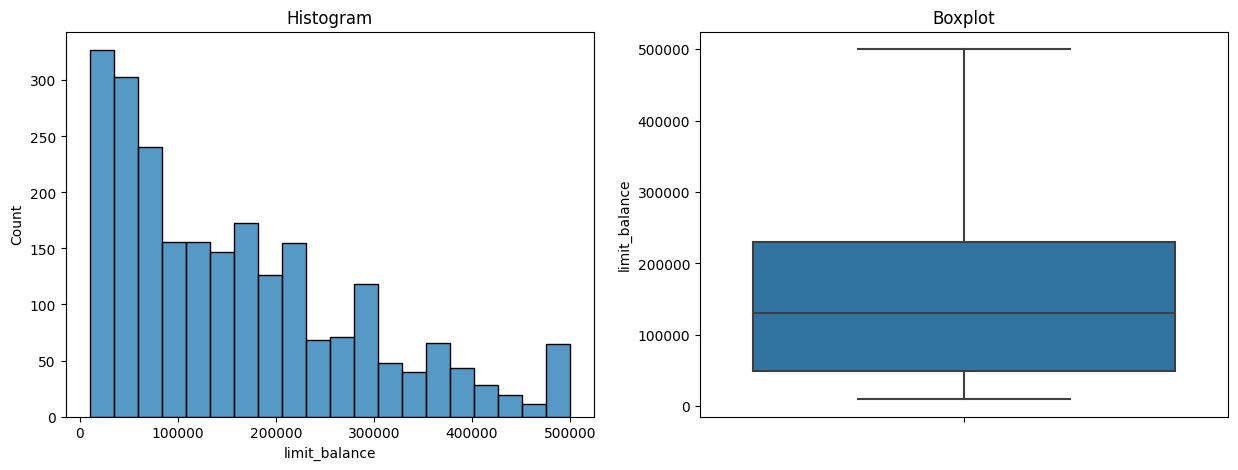

limit_balance skewness value :  0.9120992536789746


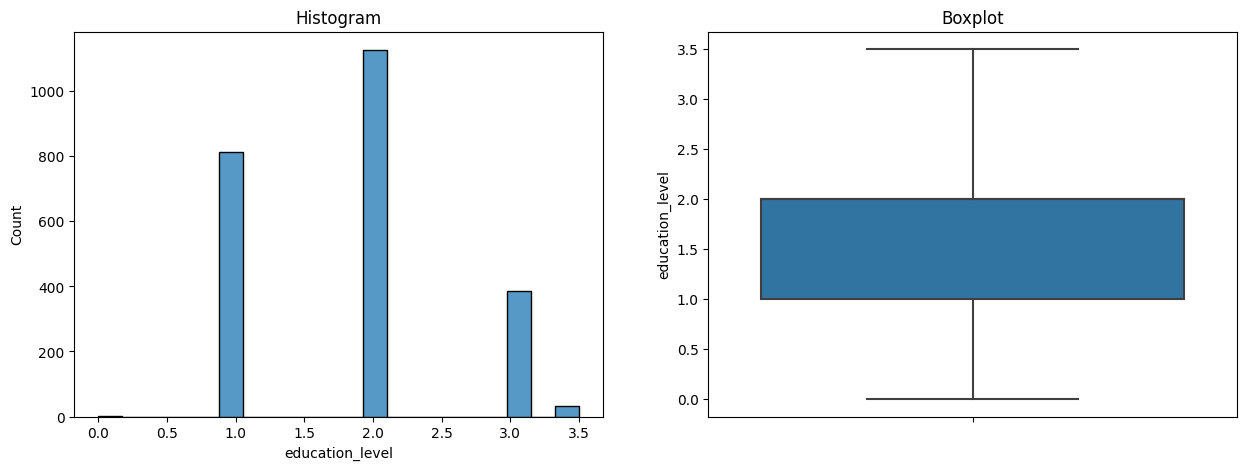

education_level skewness value :  0.30516168664619264


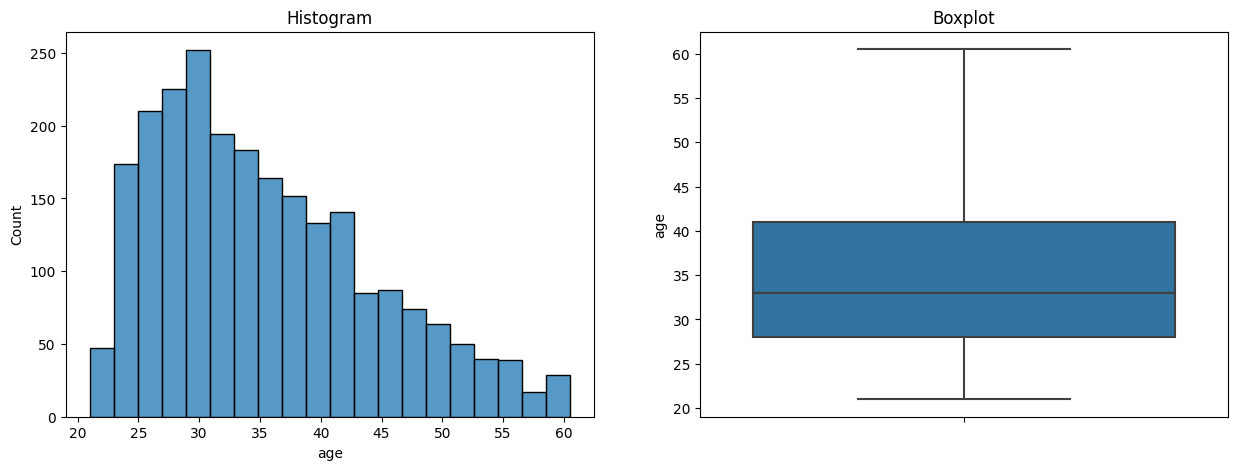

age skewness value :  0.7082370667834663


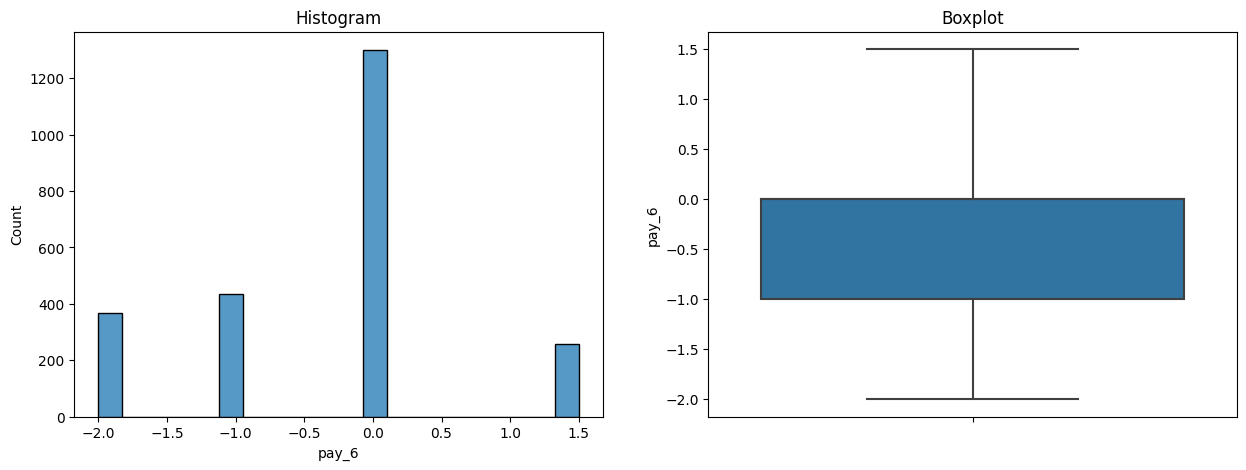

pay_6 skewness value :  -0.09405479977818162


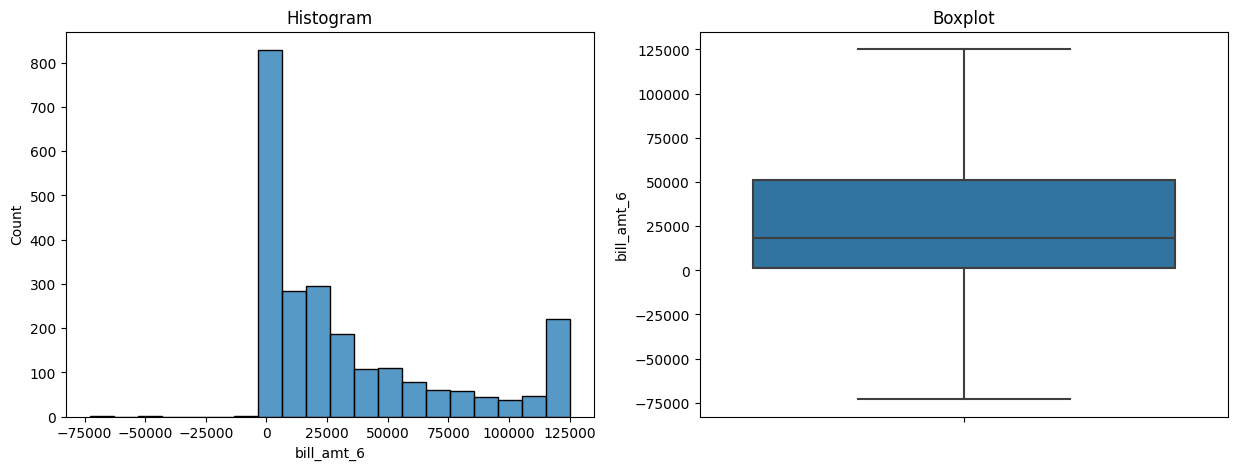

bill_amt_6 skewness value :  1.185251059183639


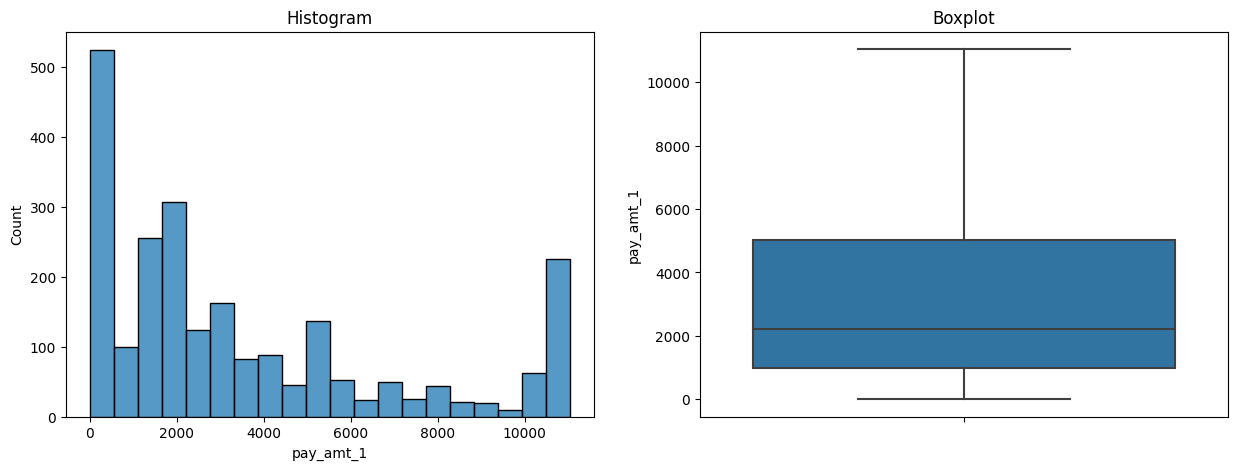

pay_amt_1 skewness value :  1.0155223288850002


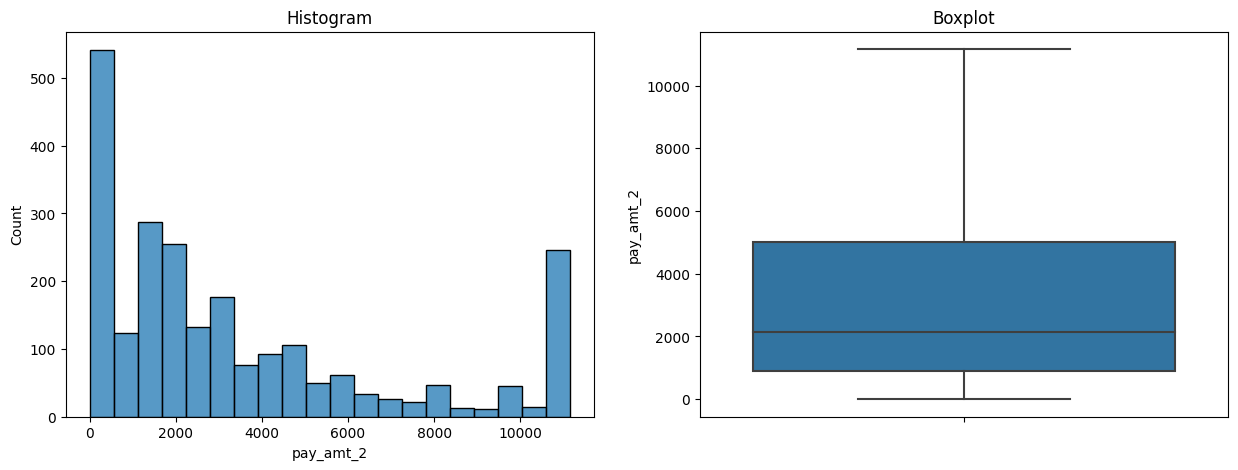

pay_amt_2 skewness value :  1.0827660180338092


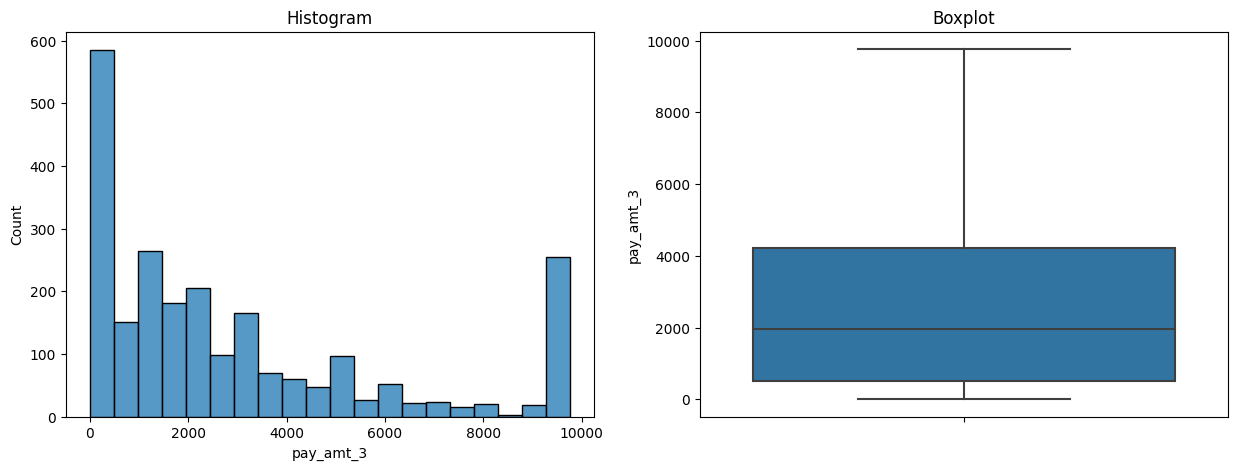

pay_amt_3 skewness value :  1.148204331161635


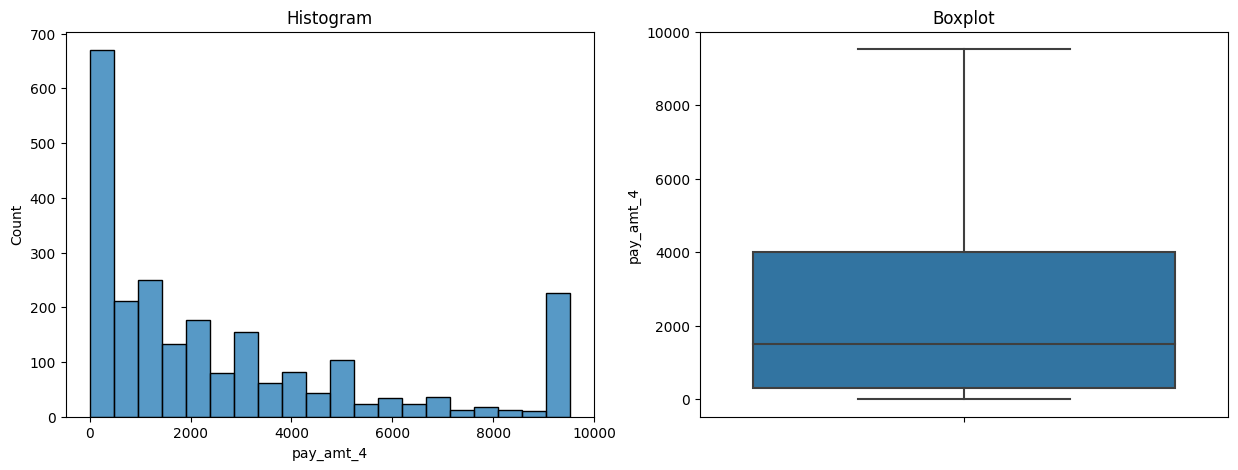

pay_amt_4 skewness value :  1.2024704606537169


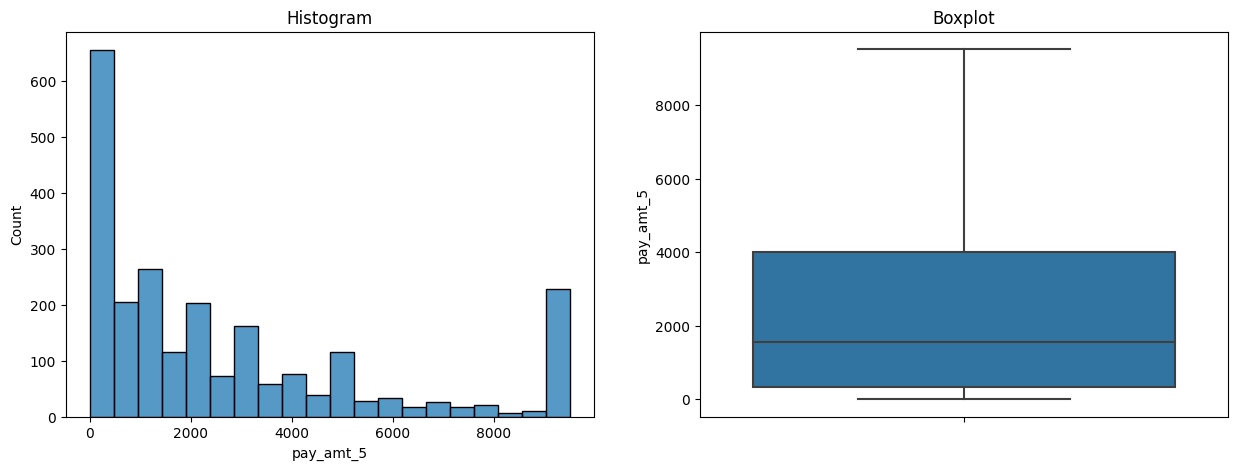

pay_amt_5 skewness value :  1.2052935573093377


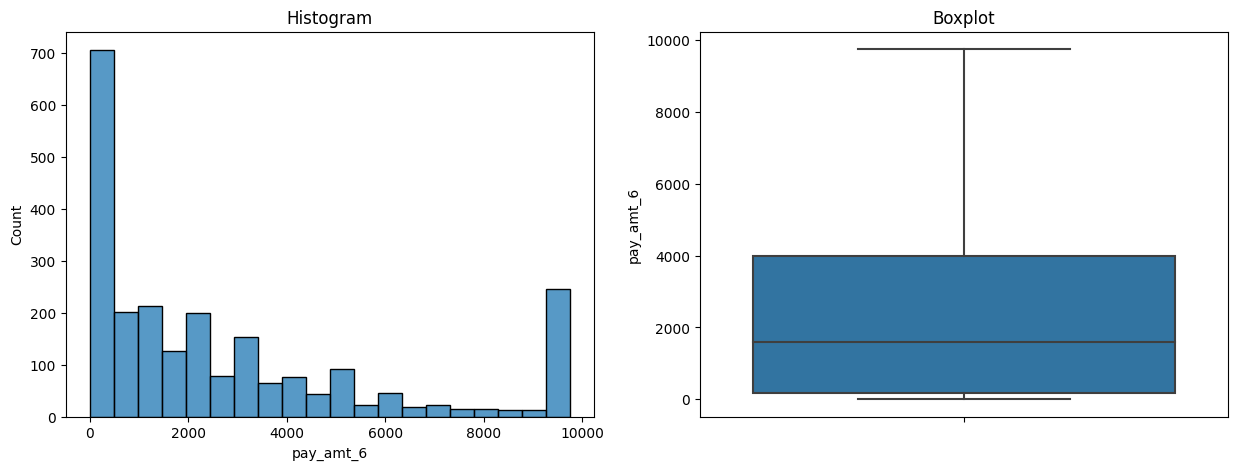

pay_amt_6 skewness value :  1.2041974531863584


In [27]:
hist_box(X_train_capped, 'limit_balance')
hist_box(X_train_capped, 'education_level')
hist_box(X_train_capped, 'age')

hist_box(X_train_capped, 'pay_6')

hist_box(X_train_capped, 'bill_amt_6')

hist_box(X_train_capped, 'pay_amt_1')
hist_box(X_train_capped, 'pay_amt_2')
hist_box(X_train_capped, 'pay_amt_3')
hist_box(X_train_capped, 'pay_amt_4')
hist_box(X_train_capped, 'pay_amt_5')
hist_box(X_train_capped, 'pay_amt_6')

>Outlier sudah di handle.

**Feature Selection**

In [28]:
# Drop Column yang tidak digunakan pada X-train
X_train_capped.drop(['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5'], axis=1, inplace=True)

# Drop Column yang tidak digunakan pada X-test
X_test_capped.drop(['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5'], axis=1, inplace=True)

In [29]:
X_train_capped

,limit_balance,sex,education_level,marital_status,age,pay_6,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2459,280000,1,2.0,1,37.0,-1.0,40485,5505.00,3258.0,3120.00,4000,9515.5,9752.5
557,200000,2,1.0,1,34.0,0.0,9006,1631.00,11157.5,9761.25,569,3000.0,9752.5
2781,230000,2,1.0,1,34.0,0.0,107780,10001.00,5000.0,4500.00,5000,6500.0,4300.0
561,400000,2,1.0,1,28.0,0.0,125155,11043.75,0.0,9761.25,9526,9515.5,0.0
2115,20000,1,1.0,2,24.0,-2.0,0,0.00,11157.5,0.00,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,420000,2,2.0,1,29.0,0.0,60290,2011.00,3000.0,9761.25,5000,2000.0,3000.0
905,30000,1,2.0,2,39.0,0.0,18013,1514.00,1278.0,671.00,870,879.0,0.0
1096,320000,1,1.0,2,34.0,0.0,121465,11043.75,11157.5,9761.25,9526,9515.5,2437.0
235,60000,1,2.0,1,41.0,-1.0,9079,5070.00,1219.0,1007.00,8,9381.0,1156.0


**Feature Scaling**

In [30]:
scaler = MinMaxScaler()
#scaling menggunakan MinMaxScaler agar mesin membaca data dengan sama antar satu variabel dengan variabel lain.
#MixMaxScaler digunakan sebab mayoritas distribusi datanya skewed.

In [31]:
#fit dan transform X-train
X_train_final = scaler.fit_transform(X_train_capped)

#transform X-test
X_test_final = scaler.transform(X_test_capped)

In [32]:
# membuat X-train-final menjadi dataframe
X_train_df = pd.DataFrame(X_train_final, columns=['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'bill_amt_6'])

X_train_df

,limit_balance,sex,education_level,marital_status,age,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,bill_amt_6
0,0.551020,0.0,0.571429,0.333333,0.405063,0.285714,0.572434,0.498472,0.292001,0.319631,0.419903,1.000000,1.000000
1,0.387755,1.0,0.285714,0.333333,0.329114,0.571429,0.413472,0.147685,1.000000,1.000000,0.059731,0.315275,1.000000
2,0.448980,1.0,0.285714,0.333333,0.329114,0.571429,0.912260,0.905580,0.448129,0.461007,0.524879,0.683096,0.440913
3,0.795918,1.0,0.285714,0.333333,0.177215,0.571429,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
4,0.020408,0.0,0.285714,0.666667,0.075949,0.000000,0.367993,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,0.836735,1.0,0.571429,0.333333,0.202532,0.571429,0.672445,0.182094,0.268877,1.000000,0.524879,0.210183,0.307613
2356,0.040816,0.0,0.571429,0.666667,0.455696,0.571429,0.458955,0.137091,0.114542,0.068741,0.091329,0.092376,0.000000
2357,0.632653,0.0,0.285714,0.666667,0.329114,0.571429,0.981366,1.000000,1.000000,1.000000,1.000000,1.000000,0.249885
2358,0.102041,0.0,0.571429,0.333333,0.506329,0.285714,0.413840,0.459083,0.109254,0.103163,0.000840,0.985865,0.118534


---
# 6. Model Definition
---

**Model Definition** - Base Model

In [33]:
#model logistic regression
logreg = LogisticRegression()

#model SVM
svm = SVC()

#model Decision Tree
tree = DecisionTreeClassifier()

#model Random Forest
forest = RandomForestClassifier()

#model KNN
knn = KNeighborsClassifier()

#model Naive Bayes
naive = GaussianNB()

#model AdaBoost
boost = AdaBoostClassifier()

**Cross Validation & Hyperparameter Tunning**

**a. Logistic Regression**

In [34]:
#validasi sebanyak 6x
k_logreg=KFold(n_splits=6)

#cross-validation
score_logreg = cross_val_score(logreg, X_train_final, y_train, cv=k_logreg)

print("Score 6 Cross Validation {}".format(score_logreg))
print("Mean Cross Validation score :{}".format(score_logreg.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_logreg.std()))

Score 6 Cross Validation [0.82233503 0.79441624 0.77862595 0.78117048 0.80916031 0.79389313]
Mean Cross Validation score :0.7966001903015117
Standar deviasi Cross Validation score :0.015238575189185768


In [35]:
print(0.7966001903015117-0.015238575189185768)
print(0.7966001903015117+0.015238575189185768)

0.7813616151123259
0.8118387654906976


>Nilai rata-rata yang didapat adalah 0.796 dengan standart deviasi 0.016. setelah di validasi sebanyak 6x, maka didapat nilai akurasi model sebesar 0.781 - 0.811 pada train set dan juga test set.

**b. SVM**

In [36]:
#validasi sebanyak 6x
k_svm=KFold(n_splits=6)

#cross-validation
score_svm = cross_val_score(svm, X_train_final, y_train, cv=k_svm)

print("Score 6 Cross Validation {}".format(score_svm))
print("Mean Cross Validation score :{}".format(score_svm.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_svm.std()))

Score 6 Cross Validation [0.82994924 0.79949239 0.77862595 0.77608142 0.80661578 0.80152672]
Mean Cross Validation score :0.7987152495231699
Standar deviasi Cross Validation score :0.01808479327853697


In [37]:
print(0.7987152495231699-0.01808479327853697)
print(0.7987152495231699+0.01808479327853697)

0.7806304562446329
0.8168000428017068


>Nilai rata-rata yang didapat adalah 0.798 dengan standart deviasi 0.019. setelah di validasi sebanyak 6x, maka didapat nilai akurasi model sebesar 0.780 - 0.816 pada train set dan juga test set.

**c. Decision Tree**

In [38]:
#validasi sebanyak 6x
k_tree=KFold(n_splits=6)

#cross-validation
score_tree = cross_val_score(tree, X_train_final, y_train, cv=k_tree)

print("Score 6 Cross Validation {}".format(score_tree))
print("Mean Cross Validation score :{}".format(score_tree.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_tree.std()))

Score 6 Cross Validation [0.6751269  0.67258883 0.70229008 0.69720102 0.64631043 0.68193384]
Mean Cross Validation score :0.679241850832892
Standar deviasi Cross Validation score :0.01828785092244129


In [39]:
print(0.6826108764633195-0.01489862141137012)
print(0.6826108764633195+0.01489862141137012)

0.6677122550519494
0.6975094978746896


>Nilai rata-rata yang didapat adalah 0.682 dengan standart deviasi 0.018. setelah di validasi sebanyak 6x, maka didapat nilai akurasi model sebesar 0.667 - 0.697 pada train set dan juga test set.

**d. Random Forest**

In [40]:
#validasi sebanyak 6x
k_forest=KFold(n_splits=6)

#cross-validation
score_forest = cross_val_score(forest, X_train_final, y_train, cv=k_forest)

print("Score 6 Cross Validation {}".format(score_forest))
print("Mean Cross Validation score :{}".format(score_forest.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_forest.std()))

Score 6 Cross Validation [0.80964467 0.78426396 0.77099237 0.77099237 0.78880407 0.78117048]
Mean Cross Validation score :0.7843113194955719
Standar deviasi Cross Validation score :0.013080644639454912


In [41]:
print(0.7838883076512402-0.01335594843145259)
print(0.7838883076512402+0.01335594843145259)

0.7705323592197876
0.7972442560826928


>Nilai rata-rata yang didapat adalah 0.783 dengan standart deviasi 0.012. setelah di validasi sebanyak 6x, maka didapat nilai akurasi model sebesar 0.770 - 0.797 pada train set dan juga test set.

**e. KNN**

In [42]:
#validasi sebanyak 6x
k_knn=KFold(n_splits=6)

#cross-validation
score_knn = cross_val_score(knn, X_train_final, y_train, cv=k_knn)

print("Score 6 Cross Validation {}".format(score_knn))
print("Mean Cross Validation score :{}".format(score_knn.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_knn.std()))

Score 6 Cross Validation [0.80964467 0.74619289 0.76335878 0.74554707 0.79898219 0.77099237]
Mean Cross Validation score :0.7724529950960765
Standar deviasi Cross Validation score :0.02444510356348917


In [43]:
print(0.7724529950960765-0.02444510356348917)
print(0.7724529950960765+0.02444510356348917)

0.7480078915325873
0.7968980986595656


>Nilai rata-rata yang didapat adalah 0.772 dengan standart deviasi 0.015. setelah di validasi sebanyak 6x, maka didapat nilai akurasi model sebesar 0.748 - 0.796 pada train set dan juga test set.

**f. Naive Bayes**

In [44]:
#validasi sebanyak 6x
k_naive=KFold(n_splits=6)

#cross-validation
score_naive = cross_val_score(naive, X_train_final, y_train, cv=k_naive)

print("Score 6 Cross Validation {}".format(score_naive))
print("Mean Cross Validation score :{}".format(score_naive.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_naive.std()))

Score 6 Cross Validation [0.64974619 0.6319797  0.60050891 0.61323155 0.63867684 0.61323155]
Mean Cross Validation score :0.6245624572144509
Standar deviasi Cross Validation score :0.016949946183166486


In [45]:
print(0.6245624572144509-0.016949946183166486)
print(0.6245624572144509+0.016949946183166486)

0.6076125110312844
0.6415124033976174


>Nilai rata-rata yang didapat adalah 0.624 dengan standart deviasi 0.016. setelah di validasi sebanyak 6x, maka didapat nilai akurasi model sebesar 0.607 - 0.641 pada train set dan juga test set.

**g. AdaBoost**

In [46]:
#validasi sebanyak 6x
k_boost=KFold(n_splits=6)

#cross-validation
score_boost = cross_val_score(boost, X_train_final, y_train, cv=k_boost)

print("Score 6 Cross Validation {}".format(score_boost))
print("Mean Cross Validation score :{}".format(score_boost.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_boost.std()))

Score 6 Cross Validation [0.82994924 0.79187817 0.78880407 0.78880407 0.78880407 0.79389313]
Mean Cross Validation score :0.7970221257798272
Standar deviasi Cross Validation score :0.014849550434526673


In [47]:
print(0.7970221257798272-0.014849550434526673)
print(0.7970221257798272+0.014849550434526673)

0.7821725753453006
0.8118716762143539


>Nilai rata-rata yang didapat adalah 0.797 dengan standart deviasi 0.018. setelah di validasi sebanyak 6x, maka didapat nilai akurasi model sebesar 0.782 - 0.811 pada train set dan juga test set.

---

In [48]:
#Logistic Regression
mean_logreg = score_logreg.mean()
std_logreg = score_logreg.std()

#SVM
mean_svm = score_svm.mean()
std_svm = score_svm.std()

#Decision Tree
mean_tree = score_tree.mean()
std_tree = score_tree.std()

#Random Forest
mean_forest = score_forest.mean()
std_forest = score_forest.std()

#KNN
mean_knn = score_knn.mean()
std_knn = score_knn.std()

#Naive Bayes
mean_naive = score_naive.mean()
std_naive = score_naive.std()

#AdaBoost
mean_boost = score_boost.mean()
std_boost = score_boost.std()

In [49]:
#DataFrame Cross Validation
crossval = {'model' : ['LogReg', 'SVM', 'DT', 'RF', 'KNN', 'NB', 'AB'],
    'Mean' : [mean_logreg, mean_svm, mean_tree, mean_forest, mean_knn, mean_naive, mean_boost],
    'Stdev' : [std_logreg, std_svm, std_tree, std_forest, std_knn, std_naive, std_boost],
    'Mean-Stdev' : [mean_logreg-std_logreg, mean_svm-std_svm, mean_tree-std_tree, mean_forest-std_forest, mean_knn-std_knn, mean_naive-std_naive, mean_boost-std_boost],
    'Mean+Stdev' : [mean_logreg+std_logreg, mean_svm+std_svm, mean_tree+std_tree, mean_forest+std_forest, mean_knn+std_knn, mean_naive+std_naive, mean_boost+std_boost]
    }

data_crossval = pd.DataFrame(crossval)
data_crossval.sort_values('Mean', ascending=False)

,model,Mean,Stdev,Mean-Stdev,Mean+Stdev
1,SVM,0.798715,0.018085,0.780630,0.816800
6,AB,0.797022,0.014850,0.782173,0.811872
0,LogReg,0.796600,0.015239,0.781362,0.811839
3,RF,0.784311,0.013081,0.771231,0.797392
4,KNN,0.772453,0.024445,0.748008,0.796898
2,DT,0.679242,0.018288,0.660954,0.697530
5,NB,0.624562,0.016950,0.607613,0.641512


Berdasarkan hasil cross validation:

a. Berdasarkan mean tertinggi, maka SVM mempunyai nilai mean tertinggi

b. Berdasarkan nilai mean - stdev, maka adaboost merupakan model dengan nilai akurasi tertinggi

c. Berdasarkan nilai mean + stdev, maka SVM merupakan model dengan nilai akurasi tertinggi.

berdasarkan hasil perhitungan akurasi sederhana, maka SVM dipilih sebagai best model untuk kemudian dilakukan gridsearchCV()

In [50]:
#definisikan parameter
param_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid']}

#gridsearch dengan cross validation 6x
svm_grid = GridSearchCV(svm, param_svm, cv=6, scoring='accuracy', return_train_score=True)

---
# 7. Model Training
---

**a. Logistic Regression**

In [51]:
logreg.fit(X_train_final, y_train)

LogisticRegression()

**b. SVM**

In [52]:
#base model
svm_default = svm.fit(X_train_final, y_train)
svm_default

SVC()

In [53]:
svm_grid.fit(X_train_final, y_train)

GridSearchCV(cv=6, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='accuracy')

In [54]:
#menentukan penggunaan parameter terbaik bagi model
print('SVM best params:', svm_grid.best_params_)
print('SVM best score:', svm_grid.best_score_)

SVM best params: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVM best score: 0.7978821422266998


>kombinasi parameter terbaik untuk model SVM adalah 'C': 100, 'gamma': 0.1, 'kernel': 'rbf'

In [55]:
#best model
svm_best = svm_grid.best_estimator_
svm_best

SVC(C=100, gamma=0.1)

**c. Decision Tree**

In [56]:
tree.fit(X_train_final, y_train)

DecisionTreeClassifier()

**d. Random Forest**

In [57]:
forest.fit(X_train_final, y_train)

RandomForestClassifier()

**e. KNN**

In [58]:
knn.fit(X_train_final, y_train)

KNeighborsClassifier()

**f. Naive Bayes**

In [59]:
naive.fit(X_train_final, y_train)

GaussianNB()

**g. AdaBoost**

In [60]:
boost.fit(X_train_final, y_train)

AdaBoostClassifier()

---
# 8. Model Evaluation
---

**a. Logistic Regression**

In [61]:
#predict data train & data test 
y_pred_train_logreg = logreg.predict(X_train_final)
y_pred_test_logreg = logreg.predict(X_test_final)

In [62]:
#Confusion Matrix

print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_logreg))
print('')
print('Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_logreg))

Hasil prediksi train-set
[[1821   21]
 [ 460   58]]

Hasil prediksi test-set
[[470   6]
 [105   9]]


In [63]:
print('Train - Set')
print('true positive + true negative:', 1821+58)
print('false positive + false negative:', 460+21)
print('persentase data terprediksi benar:', 1879/2360)
print('persentase data terprediksi salah:', 481/2360)

Train - Set
true positive + true negative: 1879
false positive + false negative: 481
persentase data terprediksi benar: 0.7961864406779661
persentase data terprediksi salah: 0.2038135593220339


In [64]:
print('Test - Set')
print('true positive + true negative:', 470+9)
print('false positive + false negative:', 105+9)
print('persentase data terprediksi benar:', 479/590)
print('persentase data terprediksi salah:', 114/590)

Test - Set
true positive + true negative: 479
false positive + false negative: 114
persentase data terprediksi benar: 0.811864406779661
persentase data terprediksi salah: 0.19322033898305085


In [65]:
print('accuracy score train : ',accuracy_score(y_train, y_pred_train_logreg))
print('accuracy score test : ',accuracy_score(y_test, y_pred_test_logreg))


accuracy score train :  0.7961864406779661
accuracy score test :  0.811864406779661


>Perbedaan prediksi antara train-set-test tidak terlalu jauh, dapat dikatakan bahwa model goodfit

In [66]:
#Classification Report
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_logreg))
print('')
print('Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_logreg))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1842
           1       0.73      0.11      0.19       518

    accuracy                           0.80      2360
   macro avg       0.77      0.55      0.54      2360
weighted avg       0.78      0.80      0.73      2360


Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.82      0.99      0.89       476
           1       0.60      0.08      0.14       114

    accuracy                           0.81       590
   macro avg       0.71      0.53      0.52       590
weighted avg       0.78      0.81      0.75       590



>Mengacu pada f1-score untuk label 0 dan 1, dapat diambil kesimpulan bahwa model yang dibangun untuk label 0 train-set dan test-set bahwa model yang dibangun telah bagus, walaupun pada label 1, nilai prediksi sangat kecil, hal ini wajar karena pola atau data pada label 1 sangat sedikit.
>
>secara akurasi keseluruhan, perbedaan antara train-set dan test-set tidak terlalu jauh, yakni 80% dan 81%, mengindikasikan bahwa model merupakan model yang goodfit karena tidak adanya perbedaan yang signifikan
>
>namun, melansir dari artikel di medium, jika dilihat secara keseluruhan dari macro average, moodel train-set hanya mendapatkan hasil prediksi 54%, begitu pula dengan test-set yang mendapatkan prediksi hanya sebesar 52%.

**b. SVM**

**SVM - Base Model**

In [67]:
#predict data train & data test
y_pred_train_svmbase = svm_default.predict(X_train_final)
y_pred_test_svmbase = svm_default.predict(X_test_final)

In [68]:
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_svmbase))
print('')
print('Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_svmbase))

Hasil prediksi train-set
[[1778   64]
 [ 386  132]]

Hasil prediksi test-set
[[456  20]
 [ 86  28]]


In [69]:
print('Train - Set')
print('true positive + true negative:', 1778+133)
print('false positive + false negative:', 386+64)
print('persentase data terprediksi benar:', 1911/2360)
print('persentase data terprediksi salah:', 450/2360)

Train - Set
true positive + true negative: 1911
false positive + false negative: 450
persentase data terprediksi benar: 0.8097457627118644
persentase data terprediksi salah: 0.1906779661016949


In [70]:
print('Test - Set')
print('true positive + true negative:', 456+28)
print('false positive + false negative:', 86+20)
print('persentase data terprediksi benar:', 484/590)
print('persentase data terprediksi salah:', 106/590)

Test - Set
true positive + true negative: 484
false positive + false negative: 106
persentase data terprediksi benar: 0.8203389830508474
persentase data terprediksi salah: 0.17966101694915254


In [71]:
print('base model:')
print('accuracy score train : ',accuracy_score(y_train, y_pred_train_svmbase))
print('accuracy score test : ',accuracy_score(y_test, y_pred_test_svmbase))

base model:
accuracy score train :  0.809322033898305
accuracy score test :  0.8203389830508474


In [72]:
#Classification Report

print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_svmbase))
print('')
print('Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_svmbase))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1842
           1       0.67      0.25      0.37       518

    accuracy                           0.81      2360
   macro avg       0.75      0.61      0.63      2360
weighted avg       0.79      0.81      0.77      2360


Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       476
           1       0.58      0.25      0.35       114

    accuracy                           0.82       590
   macro avg       0.71      0.60      0.62       590
weighted avg       0.79      0.82      0.79       590



>Mengacu pada f1-score untuk label 0 dan 1, dapat diambil kesimpulan bahwa model yang dibangun untuk label 0 train-set dan test-set bahwa model yang dibangun telah bagus, walaupun pada label 1, nilai prediksi sangat kecil, hal ini wajar karena pola atau data pada label 1 sangat sedikit.
>
>secara akurasi keseluruhan, perbedaan antara train-set dan test-set tidak terlalu jauh, yakni 81% dan 82%, mengindikasikan bahwa model merupakan model yang goodfit karena tidak adanya perbedaan yang signifikan
>
>namun, melansir dari artikel di medium, jika dilihat secara keseluruhan dari macro average, moodel train-set hanya mendapatkan hasil prediksi 63%  dan 62% antara train-set dan test-set, sebenarnya hasil sudah cukup baik dari logistic regression, namun model evaluation lebih lanjut akan dilihat pada model lainnya.

**SVM - Best Parameter**

In [73]:
#predict data train & data test
y_pred_train_svmbest = svm_best.predict(X_train_final)
y_pred_test_svmbest = svm_best.predict(X_test_final)

In [74]:
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_svmbest))
print('')
print('Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_svmbest))

Hasil prediksi train-set
[[1762   80]
 [ 382  136]]

Hasil prediksi test-set
[[451  25]
 [ 80  34]]


In [75]:
print('Train - Set')
print('true positive + true negative:', 1762+136)
print('false positive + false negative:', 382+80)
print('persentase data terprediksi benar:', 1898/2360)
print('persentase data terprediksi salah:', 462/2360)

Train - Set
true positive + true negative: 1898
false positive + false negative: 462
persentase data terprediksi benar: 0.8042372881355933
persentase data terprediksi salah: 0.19576271186440677


In [76]:
print('Test - Set')
print('true positive + true negative:', 451+25)
print('false positive + false negative:', 80+34)
print('persentase data terprediksi benar:', 476/590)
print('persentase data terprediksi salah:', 114/590)

Test - Set
true positive + true negative: 476
false positive + false negative: 114
persentase data terprediksi benar: 0.8067796610169492
persentase data terprediksi salah: 0.19322033898305085


In [77]:
print('accuracy score train : ',accuracy_score(y_train, y_pred_train_svmbest))
print('accuracy score test : ',accuracy_score(y_test, y_pred_test_svmbest))

accuracy score train :  0.8042372881355933
accuracy score test :  0.8220338983050848


>Perbedaan prediksi antara train-set-test tidak terlalu jauh, dapat dikatakan bahwa model goodfit.
>
>pada base model, akurasi score train adalah `0.809322033898305` dan score test adalah `0.8203389830508474`.
>
>pada model setelah dilakukan tuning, score train adalah `0.8042372881355933` dan score test adalah `0.8220338983050848`
>
>perbedaan antar kedua test tidak jauh berbeda, hanya sepersekian koma pembeda sebelum tuning dan setelah

In [78]:
#Classification Report

print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_svmbest))
print('')
print('Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_svmbest))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1842
           1       0.63      0.26      0.37       518

    accuracy                           0.80      2360
   macro avg       0.73      0.61      0.63      2360
weighted avg       0.78      0.80      0.77      2360


Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       476
           1       0.58      0.30      0.39       114

    accuracy                           0.82       590
   macro avg       0.71      0.62      0.64       590
weighted avg       0.80      0.82      0.80       590



>Mengacu pada f1-score untuk label 0 dan 1, dapat diambil kesimpulan bahwa model yang dibangun untuk label 0 train-set dan test-set bahwa model yang dibangun telah bagus, walaupun pada label 1, nilai prediksi sangat kecil, hal ini wajar karena pola atau data pada label 1 sangat sedikit.
>
>secara akurasi keseluruhan, perbedaan antara train-set dan test-set tidak terlalu jauh, yakni 81% dan 82%, mengindikasikan bahwa model merupakan model yang goodfit karena tidak adanya perbedaan yang signifikan
>
>namun, melansir dari artikel di medium, jika dilihat secara keseluruhan dari macro average, moodel train-set hanya mendapatkan hasil prediksi 63% antara train-set dan test-set, sebenarnya hasil sudah cukup baik dari logistic regression, namun model evaluation lebih lanjut akan dilihat pada model lainnya.

**c. Decision Tree**

In [79]:
#predict data train & data test
y_pred_train_tree = tree.predict(X_train_final)
y_pred_test_tree = tree.predict(X_test_final)

In [80]:
#Confusion Matrix

print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_tree))
print('')
print('Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_tree))

Hasil prediksi train-set
[[1842    0]
 [   0  518]]

Hasil prediksi test-set
[[370 106]
 [ 73  41]]


In [81]:
print('Train - Set')
print('true positive + true negative:', 1842+518)
print('false positive + false negative:', 0)
print('persentase data terprediksi benar:', 2360/2360)
print('persentase data terprediksi salah:', 0/2360)

Train - Set
true positive + true negative: 2360
false positive + false negative: 0
persentase data terprediksi benar: 1.0
persentase data terprediksi salah: 0.0


In [82]:
print('Test - Set')
print('true positive + true negative:', 367+40)
print('false positive + false negative:', 74+109)
print('persentase data terprediksi benar:', 407/590)
print('persentase data terprediksi salah:', 183/590)

Test - Set
true positive + true negative: 407
false positive + false negative: 183
persentase data terprediksi benar: 0.6898305084745763
persentase data terprediksi salah: 0.3101694915254237


In [83]:
print('accuracy score train : ',accuracy_score(y_train, y_pred_train_tree))
print('accuracy score test : ',accuracy_score(y_test, y_pred_test_tree))

accuracy score train :  1.0
accuracy score test :  0.6966101694915254


>Perbedaan prediksi antara train-set-test lumayan jauh, dapat dikatakan bahwa model underfit.

In [84]:
#Classification Report

print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_tree))
print('')
print('Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_tree))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1842
           1       1.00      1.00      1.00       518

    accuracy                           1.00      2360
   macro avg       1.00      1.00      1.00      2360
weighted avg       1.00      1.00      1.00      2360


Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       476
           1       0.28      0.36      0.31       114

    accuracy                           0.70       590
   macro avg       0.56      0.57      0.56       590
weighted avg       0.73      0.70      0.71       590



>Mengacu pada f1-score untuk label 0 dan 1, dapat diambil kesimpulan bahwa model yang dibangun untuk label 0 train-set dan test-set bahwa model yang dibangun telah bagus, walaupun pada label 1, nilai prediksi sangat kecil, hal ini wajar karena pola atau data pada label 1 sangat sedikit.
>
>secara akurasi keseluruhan, perbedaan antara train-set dan test-set tidak terlalu jauh, yakni 81% dan 81%, mengindikasikan bahwa model merupakan model yang goodfit karena tidak adanya perbedaan yang signifikan
>
>namun, melansir dari artikel di medium, jika dilihat secara keseluruhan dari macro average, moodel train-set hanya mendapatkan hasil prediksi 59%, begitu pula dengan test-set yang mendapatkan prediksi hanya sebesar 57%.

**d. Random Forest**

In [85]:
#predict data train & data test
y_pred_train_forest = forest.predict(X_train_final)
y_pred_test_forest = forest.predict(X_test_final)

In [86]:
#Confusion Matrix

print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_forest))
print('')
print('Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_forest))

Hasil prediksi train-set
[[1842    0]
 [   0  518]]

Hasil prediksi test-set
[[463  13]
 [ 84  30]]


In [87]:
print('Train - Set')
print('true positive + true negative:', 1842+518)
print('false positive + false negative:', 392+16)
print('persentase data terprediksi benar:', 2360/2360)
print('persentase data terprediksi salah:', 0/2360)

Train - Set
true positive + true negative: 2360
false positive + false negative: 408
persentase data terprediksi benar: 1.0
persentase data terprediksi salah: 0.0


In [88]:
print('Test - Set')
print('true positive + true negative:', 460+29)
print('false positive + false negative:', 85+16)
print('persentase data terprediksi benar:', 489/590)
print('persentase data terprediksi salah:', 101/590)

Test - Set
true positive + true negative: 489
false positive + false negative: 101
persentase data terprediksi benar: 0.8288135593220339
persentase data terprediksi salah: 0.1711864406779661


In [89]:
print('accuracy score train : ',accuracy_score(y_train, y_pred_train_forest))
print('accuracy score test : ',accuracy_score(y_test, y_pred_test_forest))

accuracy score train :  1.0
accuracy score test :  0.8355932203389831


>Perbedaan prediksi antara train-set-test lumayan jauh, dapat dikatakan bahwa model underfit.

In [90]:
#Classification Report

print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_forest))
print('')
print('Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_forest))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1842
           1       1.00      1.00      1.00       518

    accuracy                           1.00      2360
   macro avg       1.00      1.00      1.00      2360
weighted avg       1.00      1.00      1.00      2360


Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       476
           1       0.70      0.26      0.38       114

    accuracy                           0.84       590
   macro avg       0.77      0.62      0.64       590
weighted avg       0.82      0.84      0.80       590



>Mengacu pada f1-score untuk label 0 dan 1, dapat diambil kesimpulan bahwa model yang dibangun untuk label 0 train-set dan test-set bahwa model yang dibangun telah bagus, walaupun pada label 1, nilai prediksi sangat kecil, hal ini wajar karena pola atau data pada label 1 sangat sedikit.
>
>secara akurasi keseluruhan, perbedaan antara train-set dan test-set tidak terlalu jauh, yakni 83% dan 83%, mengindikasikan bahwa model merupakan model yang goodfit karena tidak adanya perbedaan yang signifikan
>
>namun, melansir dari artikel di medium, jika dilihat secara keseluruhan dari macro average, moodel train-set hanya mendapatkan hasil prediksi 64%, begitu pula dengan test-set yang mendapatkan prediksi hanya sebesar 59%.

**e. KNN**

In [91]:
#predict data train & data test
y_pred_train_knn = knn.predict(X_train_final)
y_pred_test_knn = knn.predict(X_test_final)

In [92]:
#Confusion Matrix

print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_knn))
print('')
print('Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_knn))

Hasil prediksi train-set
[[1775   67]
 [ 352  166]]

Hasil prediksi test-set
[[448  28]
 [ 91  23]]


In [93]:
print('Train - Set')
print('true positive + true negative:', 1775+166)
print('false positive + false negative:', 352+67)
print('persentase data terprediksi benar:', 1941/2360)
print('persentase data terprediksi salah:', 419/2360)

Train - Set
true positive + true negative: 1941
false positive + false negative: 419
persentase data terprediksi benar: 0.8224576271186441
persentase data terprediksi salah: 0.17754237288135594


In [94]:
print('Test - Set')
print('true positive + true negative:', 448+23)
print('false positive + false negative:', 91+28)
print('persentase data terprediksi benar:', 472/590)
print('persentase data terprediksi salah:', 118/590)

Test - Set
true positive + true negative: 471
false positive + false negative: 119
persentase data terprediksi benar: 0.8
persentase data terprediksi salah: 0.2


In [95]:
print('accuracy score train : ',accuracy_score(y_train, y_pred_train_knn))
print('accuracy score test : ',accuracy_score(y_test, y_pred_test_knn))

accuracy score train :  0.8224576271186441
accuracy score test :  0.7983050847457627


>Perbedaan prediksi antara train-set-test tidak terlalu jauh, dapat dikatakan bahwa model goodfit

In [96]:
#Classification Report

print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_knn))
print('')
print('Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_knn))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1842
           1       0.71      0.32      0.44       518

    accuracy                           0.82      2360
   macro avg       0.77      0.64      0.67      2360
weighted avg       0.81      0.82      0.80      2360


Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       476
           1       0.45      0.20      0.28       114

    accuracy                           0.80       590
   macro avg       0.64      0.57      0.58       590
weighted avg       0.76      0.80      0.77       590



>Mengacu pada f1-score untuk label 0 dan 1, dapat diambil kesimpulan bahwa model yang dibangun untuk label 0 train-set dan test-set bahwa model yang dibangun telah bagus, walaupun pada label 1, nilai prediksi sangat kecil, hal ini wajar karena pola atau data pada label 1 sangat sedikit.
>
>secara akurasi keseluruhan, perbedaan antara train-set dan test-set tidak terlalu jauh, yakni 82% dan 80%, mengindikasikan bahwa model merupakan model yang goodfit karena tidak adanya perbedaan yang signifikan
>
>namun, melansir dari artikel di medium, jika dilihat secara keseluruhan dari macro average, moodel train-set hanya mendapatkan hasil prediksi 67%, begitu pula dengan test-set yang mendapatkan prediksi hanya sebesar 58%.

**f. Naive Bayes**

In [97]:
#predict data train & data test
y_pred_train_naive = naive.predict(X_train_final)
y_pred_test_naive = naive.predict(X_test_final)

In [98]:
#Confusion Matrix

print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_naive))
print('')
print('Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_naive))

Hasil prediksi train-set
[[1169  673]
 [ 221  297]]

Hasil prediksi test-set
[[317 159]
 [ 41  73]]


In [99]:
print('Train - Set')
print('true positive + true negative:', 1169+297)
print('false positive + false negative:', 221+673)
print('persentase data terprediksi benar:', 1466/2360)
print('persentase data terprediksi salah:', 894/2360)

Train - Set
true positive + true negative: 1466
false positive + false negative: 894
persentase data terprediksi benar: 0.6211864406779661
persentase data terprediksi salah: 0.3788135593220339


In [100]:
print('Test - Set')
print('true positive + true negative:', 317+73)
print('false positive + false negative:', 41+159)
print('persentase data terprediksi benar:', 476/590)
print('persentase data terprediksi salah:', 200/590)

Test - Set
true positive + true negative: 390
false positive + false negative: 200
persentase data terprediksi benar: 0.8067796610169492
persentase data terprediksi salah: 0.3389830508474576


In [101]:
print('accuracy score train : ',accuracy_score(y_train, y_pred_train_naive))
print('accuracy score test : ',accuracy_score(y_test, y_pred_test_naive))

accuracy score train :  0.6211864406779661
accuracy score test :  0.6610169491525424


>Perbedaan prediksi antara train-set-test tidak terlalu jauh, dapat dikatakan bahwa model goodfit

In [102]:
#Classification Report

print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_naive))
print('')
print('Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_naive))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.84      0.63      0.72      1842
           1       0.31      0.57      0.40       518

    accuracy                           0.62      2360
   macro avg       0.57      0.60      0.56      2360
weighted avg       0.72      0.62      0.65      2360


Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.89      0.67      0.76       476
           1       0.31      0.64      0.42       114

    accuracy                           0.66       590
   macro avg       0.60      0.65      0.59       590
weighted avg       0.78      0.66      0.69       590



>Mengacu pada f1-score untuk label 0 dan 1, dapat diambil kesimpulan bahwa model yang dibangun untuk label 0 train-set dan test-set bahwa model yang dibangun telah bagus, walaupun pada label 1, nilai prediksi sangat kecil, hal ini wajar karena pola atau data pada label 1 sangat sedikit.
>
>secara akurasi keseluruhan, perbedaan antara train-set dan test-set tidak terlalu jauh, yakni 62% dan 66%, mengindikasikan bahwa model merupakan model yang goodfit karena tidak adanya perbedaan yang signifikan
>
>namun, melansir dari artikel di medium, jika dilihat secara keseluruhan dari macro average, moodel train-set hanya mendapatkan hasil prediksi 56%, begitu pula dengan test-set yang mendapatkan prediksi hanya sebesar 59%.

**g. AdaBoost**

In [103]:
#predict data train & data test
y_pred_train_boost = boost.predict(X_train_final)
y_pred_test_boost = boost.predict(X_test_final)

In [104]:
#Confusion Matrix

print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_boost))
print('')
print('Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_boost))

Hasil prediksi train-set
[[1777   65]
 [ 398  120]]

Hasil prediksi test-set
[[462  14]
 [ 82  32]]


In [105]:
print('Train - Set')
print('true positive + true negative:', 1777+120)
print('false positive + false negative:', 398+65)
print('persentase data terprediksi benar:', 1897/2360)
print('persentase data terprediksi salah:', 463/2360)

Train - Set
true positive + true negative: 1897
false positive + false negative: 463
persentase data terprediksi benar: 0.8038135593220339
persentase data terprediksi salah: 0.1961864406779661


In [106]:
print('Test - Set')
print('true positive + true negative:', 462+32)
print('false positive + false negative:', 82+14)
print('persentase data terprediksi benar:', 494/590)
print('persentase data terprediksi salah:', 96/590)

Test - Set
true positive + true negative: 494
false positive + false negative: 96
persentase data terprediksi benar: 0.8372881355932204
persentase data terprediksi salah: 0.16271186440677965


In [107]:
print('accuracy score train : ',accuracy_score(y_train, y_pred_train_boost))
print('accuracy score test : ',accuracy_score(y_test, y_pred_test_boost))

accuracy score train :  0.8038135593220339
accuracy score test :  0.8372881355932204


>Perbedaan prediksi antara train-set-test tidak terlalu jauh, dapat dikatakan bahwa model goodfit

In [108]:
#Classification Report

print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_boost))
print('')
print('Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_boost))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1842
           1       0.65      0.23      0.34       518

    accuracy                           0.80      2360
   macro avg       0.73      0.60      0.61      2360
weighted avg       0.78      0.80      0.77      2360


Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       476
           1       0.70      0.28      0.40       114

    accuracy                           0.84       590
   macro avg       0.77      0.63      0.65       590
weighted avg       0.82      0.84      0.81       590



>Mengacu pada f1-score untuk label 0 dan 1, dapat diambil kesimpulan bahwa model yang dibangun untuk label 0 train-set dan test-set bahwa model yang dibangun telah bagus, walaupun pada label 1, nilai prediksi sangat kecil, hal ini wajar karena pola atau data pada label 1 sangat sedikit.
>
>secara akurasi keseluruhan, perbedaan antara train-set dan test-set tidak terlalu jauh, yakni 81% dan 83%, mengindikasikan bahwa model merupakan model yang goodfit karena tidak adanya perbedaan yang signifikan
>
>namun, melansir dari artikel di medium, jika dilihat secara keseluruhan dari macro average, moodel train-set hanya mendapatkan hasil prediksi 62%, begitu pula dengan test-set yang mendapatkan prediksi hanya sebesar 64%.

---
# 9. Model Inference
---

**b. SVM**

In [109]:
data_inf_final = scaler.transform(data_inf_drop)

In [110]:
#prediksi data-inf
y_pred_inf_svmbase = svm.predict(data_inf_final)
y_pred_inf_svmbase

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [111]:
#prediksi data-inf
y_pred_inf_svmbest = svm_best.predict(data_inf_final)
y_pred_inf_svmbest

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0])

In [112]:
#memasukkan hasil prediksi kedalam data-inf
y_pred_inf_svmbase = pd.DataFrame(y_pred_inf_svmbase, columns=['default_payment_prediction_SVM-Base'])
y_pred_inf_svmbest = pd.DataFrame(y_pred_inf_svmbest, columns=['default_payment_prediction_SVM-Best'])

data_inf_predict_svm = pd.concat([data_inf, y_pred_inf_svmbase, y_pred_inf_svmbest], axis=1)
data_inf_predict_svm

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment,default_payment_prediction_SVM-Base,default_payment_prediction_SVM-Best
0,130000,2,2,1,29,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,200000,2,2,1,27,1,3,2,2,2,2,183994,182427,182657,174547,181454,177141,5200,7000,0,13300,0,6200,1,0,1
2,50000,1,2,2,26,2,-1,-1,-1,-1,-1,291,291,291,291,291,0,291,291,291,291,0,873,0,0,0
3,240000,1,2,2,29,0,0,0,0,0,0,243774,242529,242079,243114,213930,219009,8891,12350,15969,7968,8700,17500,0,0,0
4,20000,2,2,2,39,0,0,0,0,0,0,20885,20373,19391,20085,19938,0,2157,1660,1300,541,0,0,0,0,0
5,300000,2,5,2,26,0,0,0,0,-2,-2,293880,242669,76777,34072,11632,15429,11128,47009,34044,11677,15483,6098,0,0,0
6,220000,2,2,2,47,0,0,0,0,0,0,103078,111729,115173,116513,119370,121516,10000,6500,5000,5000,5000,5000,0,0,0
7,120000,2,1,2,29,-1,-1,-1,0,-1,-1,3945,5795,10863,1601,1126,4802,5894,10863,0,1126,4802,9751,0,0,0
8,310000,2,1,2,35,-1,0,0,0,-1,-1,27089,37919,40136,31242,18962,9950,20000,21890,15000,9481,19900,0,0,0,0
9,40000,2,2,1,23,2,2,2,2,2,2,33895,33068,35704,36173,36796,37288,0,3200,1500,1500,1400,1500,1,1,1


In [113]:
#concat data inf dan semua data prediction
data_inf_conc = pd.concat([
    data_inf, 
    y_pred_inf_svmbase,
    y_pred_inf_svmbest], axis=1)

#rename kolom agar lebih singkat dan enak dilihat
data_inf_conclusion = data_inf_conc.rename(columns={
    'default_payment' : 'Default', 
    'default_payment_prediction_SVM-Base' : 'SVM - Base Model',
    'default_payment_prediction_SVM-Best' : 'SVM - Best Model'})

data_inf_conclusion[['Default', 'SVM - Base Model', 'SVM - Best Model']]

,Default,SVM - Base Model,SVM - Best Model
0,0,0,0
1,1,0,1
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,1,1,1


>karena perbedaan antara base model dan model setelah tuning sedikit, saya mencoba menggunakan kedua hasil untuk model inference
>
>dari total 15 data inference yang diambil, didapat data dengan label 0 sebanyak 12 data dan data dengan label 1 sebanyak 3 data.
>
>hasil prediksi data inference base model menunjukkan bahwa label 1 memiliki 1 salah prediksi dan label 0 memiliki 1 salah prediksi.
>
>setelah di tuning, hasil prediksi data inference best model menunjukkan bahwa label 0 memiliki 1 salah prediksi 14 data lainnya di prediksi dengan benar.

---
# 10. Kesimpulan
---

- Dataset terdiri atas 2965 baris dan 24 kolom, tidak terdapat missing values pada dataset.
- Kolom `pay` dan `bill_amount` memiliki korelasi yang tinggi antar satu dan lainnya, agar tidak terjadinya overfitting, maka hanya satu dari kolom tersebut yang dapat digunakan.
- Nilai akurasi model train set dan test set:
    - Logistic Regression : 0.796 & 0.811
    - SVM : 0.809 & 0.820
    - Decision Tree : 1.0 & 0.701
    - Random Forest : 1.0 & 0.828
    - KNN : 0.822 & 0.798
    - Naive Bayes : 0.621 & 0.661
    - Ada Boost : 0.803 & 0.837
- Berdasarkan hasil cross validation, SVM memiliki nilai mean tertinggi namun standart deviation bukanlah yang terendah. SVM tetap dipilih sebagai best model karena beberapa pertimbangan.
- Tidak banyak perubahan model SVM sebelum dan setelah di tuning, setelah di tuning, akurasi model train set dan test set SVM menjadi 0.804 & 0.822
- Masih terdapat kesalahan prediksi pada `default_payment`, hal ini diwajarkan sebab model yang dibuat masih memiliki tingkat akurasi yang tidak sempurna walaupun model sudah tergolong goodfit untuk dibuat.

---
# Conceptual Problems
---

1. Apakah fungsi parameter `criterion` pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

>`Criterion` pada Decision tree merupakan parameter yang digunakan untuk memisahkan atribut.
>ada banyak macam criterion, misalnya seperti `gain_ratio`, `gini_index`, atau `information_gain`
>
>`information_gain` sendiri cara kerjanya mengitung perbedaan semua entropi dari semua atribut dan yang memiliki nilai entropi paling sedikit dipilih sebelum dilakukan splitting. Criterion ini memiliki bias terhadap fitur yang memiliki jumlah nilai yang besar.

2. Apakah fungsi dari `pruning` pada Tree model?

>Pruning pada tree model berguna untuk mengidentifikasikan dan membuang cabang yang tidak diperlukan pada pohon yang telah terbentuk. Selain itu pruning juga bertujuan untuk mengurangi tingkat kesalahan prediksi yang mana dapat berujung pada overfitting.

3. Bagaimana cara memilih `K` yang optimal pada KNN?

>Tidak ada rumus pasti dalam penentuan nilai K, namun beberapa artikel menyarankan agar pemilihan K adalah bilangan ganjil agar voting yang dilakukan tidak seimbang. Penggunaan gridsearchCV juga dapat membantu penentuan parameter yang digunakan.

4. Jelaskan apa yang kalian ketahui tentang `Cross Validation`!

>Cross validation (cv) merupakan metode yang digunakan untuk mavalidasi kinerja dari suatu model, dimana data dipisahkan menjadi dua subset, yaitu data proses pembelajaran dan data validasi/evaluasi. Penggunaan cross validation dapat mengurangi waktu komputasi dengan tetap menjaga keakuratan estimasi. Banyaknya validasi yang dilakukan sesuai dengan nilai k-fold yang disetting, misal menggunakan nilai k-fold=6 maka cv akan menvalidasi model sebanyak 6 kali dengan cara membagi-bagi data secara seimbang kedalam 6 fold. Hasil akhirnya dapat dilihat dari nilai rata-rata dan standart deviasinya.

5. Jelaskan apa yang kalian ketahui tentang `Accuracy, Precision, Recall, F1 Score`!

>Accuracy, Precision, Recall, dan F1 Score merupakan bagian dari Confusion Matrix.
>
> - accuracy merupakan nilai seberapa baik model dalam memprediksikan klasifikasi secara benar (prediksi dan aktual sama). Akurasi ini dapat diperoleh dari nilai TP+TN/Jumlah Data.
>
> - Precision menggambarkan akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model. Precision diperoleh dari TP/Data yang Diprediksi Positif.
>
> - Recall menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi. Recall diperoleh dari perbandingan antara TP dengan banyaknya data yang sebenarnya positif.
>
> - F1-Score merupakan hasil rata-rata dari precison dan recall yang dibobotkan. jika F1-Score mendekati 1 maka model klasifikasi kita punya precision dan recall yang baik.